In [453]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [454]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [455]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [456]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Datei laden
df = pd.read_csv("C:\\Users\\ndqi9\\Downloads\\diamonds(1).csv", sep=",", index_col=0)  # ',' als Trennzeichen und die erste Spalte als Index
print(df.head())


   carat      cut color clarity  depth  table  price     x     y     z
1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


In [457]:
# Einheitlichkeit der Schreibweise, z.B. Fair <-> fair
df['cut'] = df['cut'].str.capitalize()
df['color'] = df['color'].str.upper()
df['clarity'] = df['clarity'].str.upper()

In [458]:
# Info Datensatz
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [459]:
#Check for missing values/ Nach fehlenden Werten checken
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

Häufigkeit für cut:


,Anzahl
cut,
Ideal,21551
Premium,13791
Very good,12082
Good,4906
Fair,1610


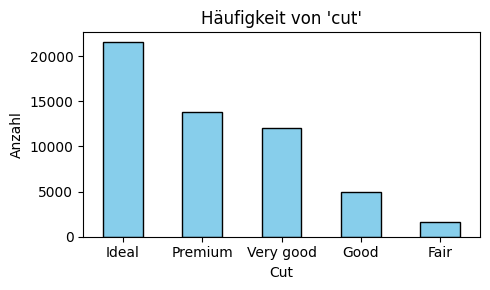

Häufigkeit für color:


,Anzahl
color,
G,11292
E,9797
F,9542
H,8304
D,6775
I,5422
J,2808


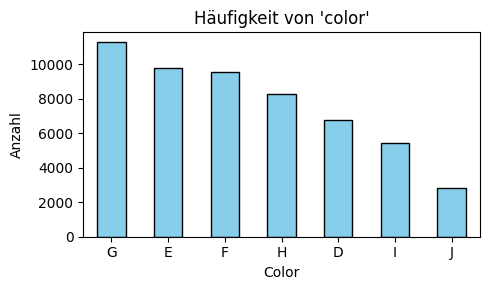

Häufigkeit für clarity:


,Anzahl
clarity,
SI1,13065
VS2,12258
SI2,9194
VS1,8171
VVS2,5066
VVS1,3655
IF,1790
I1,741


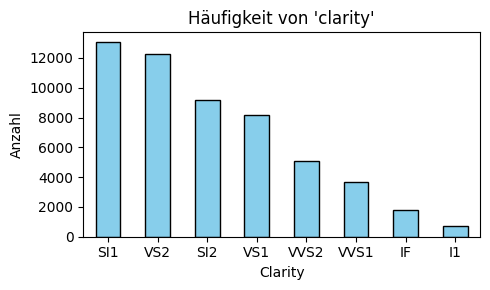

In [460]:
categorical_features = ['cut', 'color', 'clarity']

for feature in categorical_features:
    print(f"Häufigkeit für {feature}:")
    value_counts = df[feature].value_counts()
    
    # Das Folgende ist nur für die Formatierung
    styled_counts = value_counts.to_frame(name="Anzahl").style.highlight_max(axis=0, color="lightgreen").highlight_min(axis=0, color="lightcoral")
    display(styled_counts)  # Anzeige in Jupyter-Notebook

    df[feature].value_counts().plot(kind='bar', figsize=(5, 3), title=f"Häufigkeit von '{feature}'", color='skyblue', edgecolor='black')
    plt.xlabel(feature.capitalize())  # X-Achse benennen
    plt.ylabel("Anzahl")             # Y-Achse benennen
    plt.xticks(rotation=0)           # Kategorien horizontal anzeigen
    plt.tight_layout()               # Verhindert abgeschnittene Beschriftungen
    plt.show()


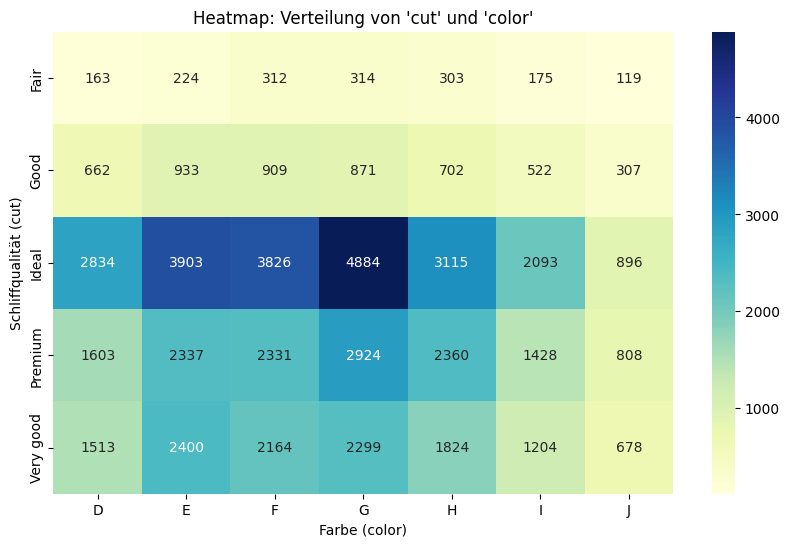

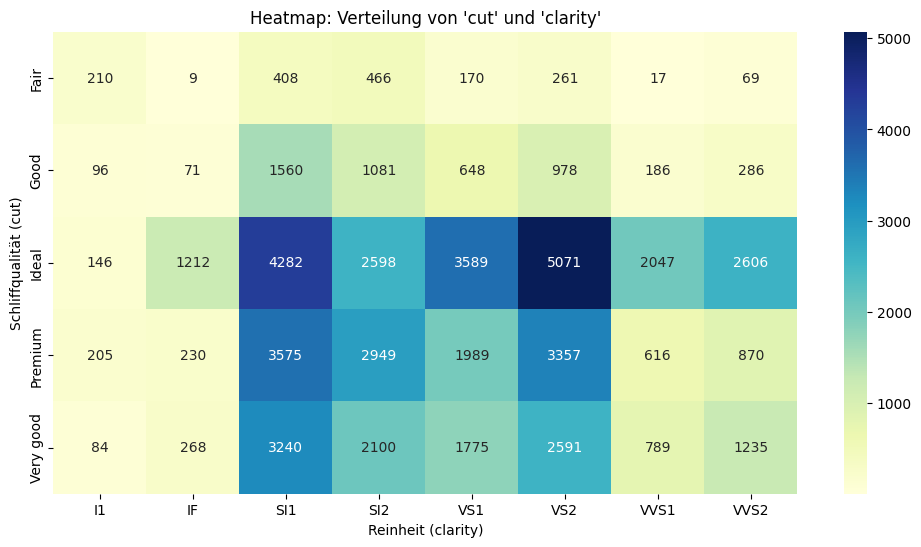

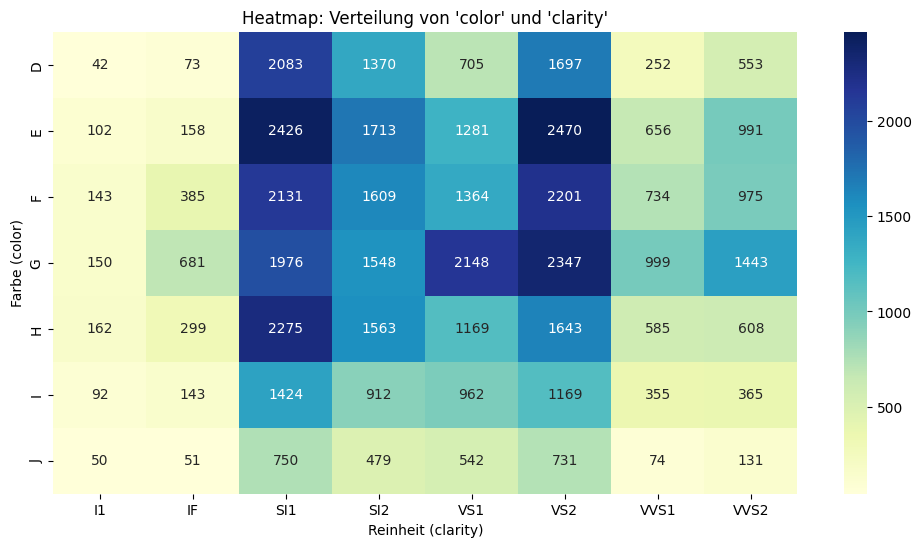

In [461]:
# Kategorische Features miteinander vergleichen
# Im Skript gibt es zwei Wege um kateg. Werte mteinander zu vergleichen. Für unsere Aufgabenstellung macht die Kreuztabellen-Methode (crosstab)
# Sinn

crosstab_cut_color = pd.crosstab(df['cut'], df['color'])
crosstab_cut_clarity = pd.crosstab(df['cut'], df['clarity'])
crosstab_color_clarity = pd.crosstab(df['color'], df['clarity'])

# Den Vergleich der kateg. Features kann man als (Kreuz-)Tabelle darstellen oder visuell als Heatmaps -> in dem Fall werden Heatmaps generiert -> durch die Farben schön interpretierbar
# Heatmap: 'cut' vs 'color' 
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab_cut_color, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Heatmap: Verteilung von 'cut' und 'color'")
plt.xlabel("Farbe (color)")
plt.ylabel("Schliffqualität (cut)")
plt.show()

# Heatmap: 'cut' vs 'clarity'
plt.figure(figsize=(12, 6))
sns.heatmap(crosstab_cut_clarity, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Heatmap: Verteilung von 'cut' und 'clarity'")
plt.xlabel("Reinheit (clarity)")
plt.ylabel("Schliffqualität (cut)")
plt.show()

# Heatmap: 'color' vs 'clarity'
plt.figure(figsize=(12, 6))
sns.heatmap(crosstab_color_clarity, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Heatmap: Verteilung von 'color' und 'clarity'")
plt.xlabel("Reinheit (clarity)")
plt.ylabel("Farbe (color)")
plt.show()

#Ergebnis:
# Dunkelblau: Höhere Häufigkeit -> mehr Diamanten in dieser Kategorie-Kombi
# Hellgelb: Niedrigere Häufigkeit -> weniger Diamanten in dieser Kategorie-Kombi

#Ergebnis bei cut und color:
# Höchste Kombi: cut = Ideal und color = G -> hochwertige Schliffe kommen häufiger in den mittleren Farbkategorien vor

#Ergebnis bei cut und clarity:
# Höchste Kombis: cut = Ideal, Premium und clarity = SI1, VS2 -> hochwertige Schliffe korrelieren mit guten Reinheitsstufen

#Ergebnis bei color und clarity:
#Höchste Kombis: clarity: Sl1, VS2 und colors: D, E, F, G, (H) -> mittlere Reinheitsstufen sind beliebter, unabhängig der Farbe


In [462]:
# Statistische Zusammenfassung für numerische Features

numerical_features = ["carat", "depth", "table", "price", "x", "y", "z"]
summary_stats = df[numerical_features].describe()

# Folgendes ist nur für Format und Stil
styled_summary = summary_stats.style.format(precision=2).highlight_max(axis=0, color="lightgreen").highlight_min(axis=0, color="lightcoral")
styled_summary

,carat,depth,table,price,x,y,z
count,53940.00,53940.00,53940.00,53940.00,53940.00,53940.00,53940.00
mean,0.80,61.75,57.46,3932.80,5.73,5.73,3.54
std,0.47,1.43,2.23,3989.44,1.12,1.14,0.71
min,0.20,43.00,43.00,326.00,0.00,0.00,0.00
25%,0.40,61.00,56.00,950.00,4.71,4.72,2.91
50%,0.70,61.80,57.00,2401.00,5.70,5.71,3.53
75%,1.04,62.50,59.00,5324.25,6.54,6.54,4.04
max,5.01,79.00,95.00,18823.00,10.74,58.90,31.80


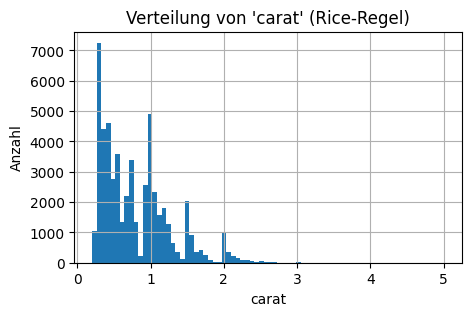

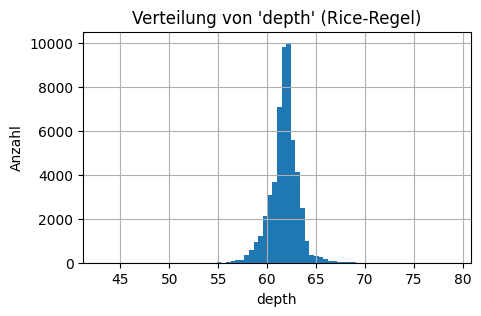

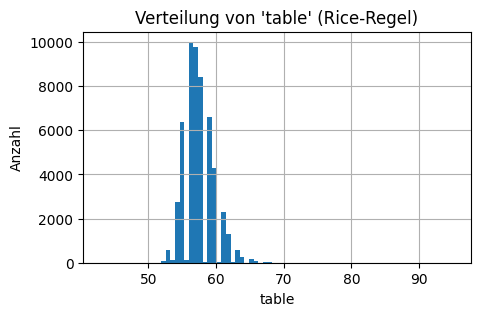

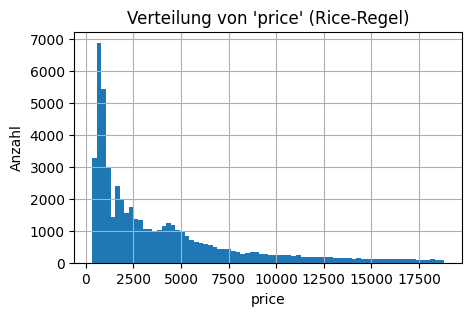

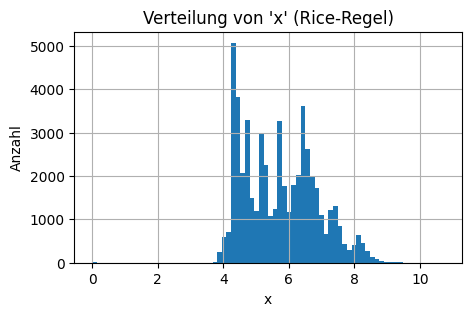

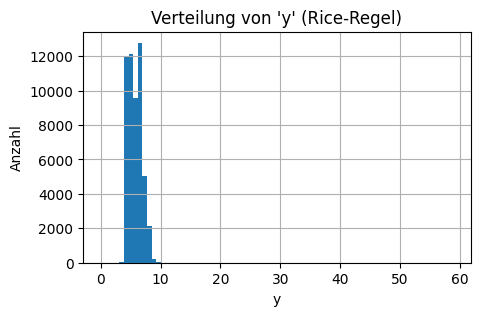

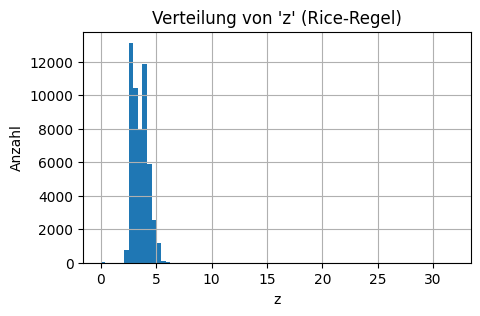

In [463]:
# Verteilung der numerischen Features visuell dargestellt
# Liste der numerischen Features
numerical_features = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

# Histogramm -> hier ist Rice-Regel von Vorteil für jedes numerische Feature (da großes Datenset mit ~54k Daten); 
# Rice Regel berechnet die Anzahl der Bins basierend auf der Anzahl der Datenpunkte n
for feature in numerical_features:
    df[feature].hist(bins="rice", figsize=(5, 3))
    plt.title(f"Verteilung von '{feature}' (Rice-Regel)")
    plt.xlabel(feature)
    plt.ylabel("Anzahl")
    plt.show()

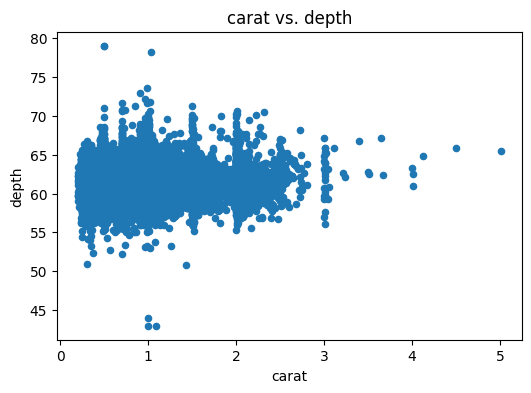

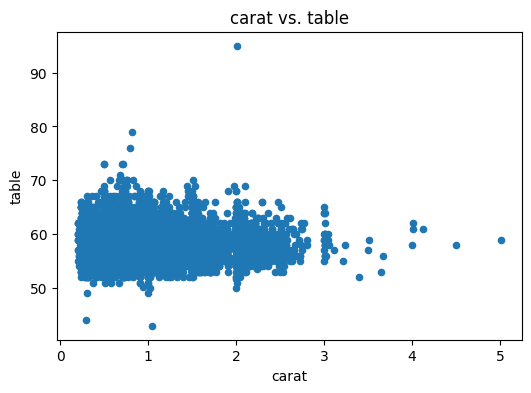

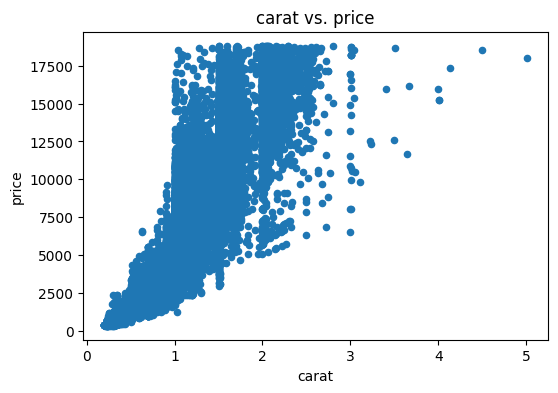

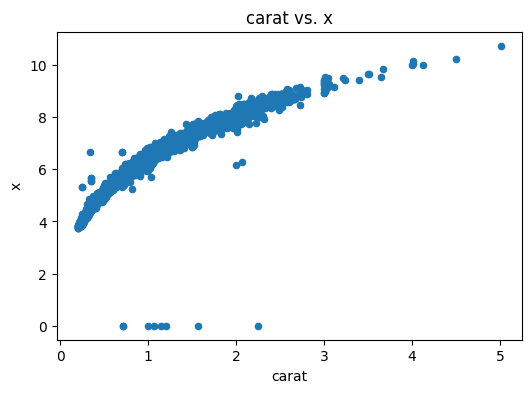

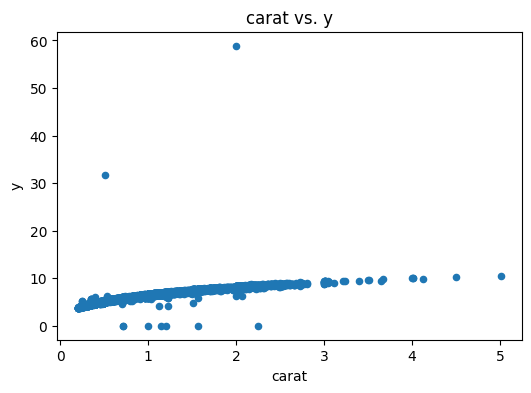

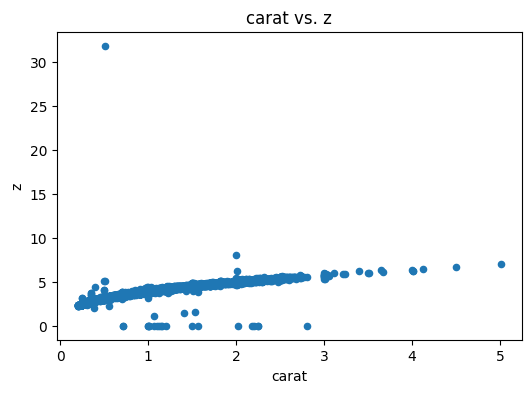

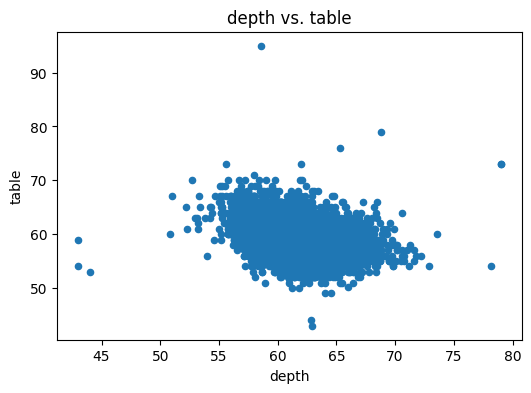

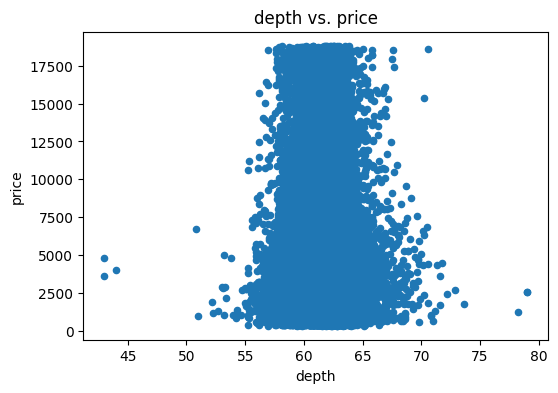

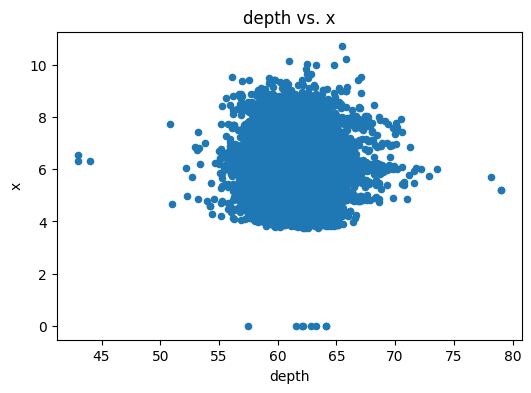

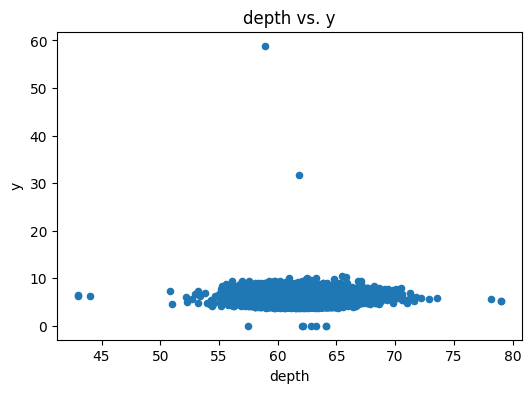

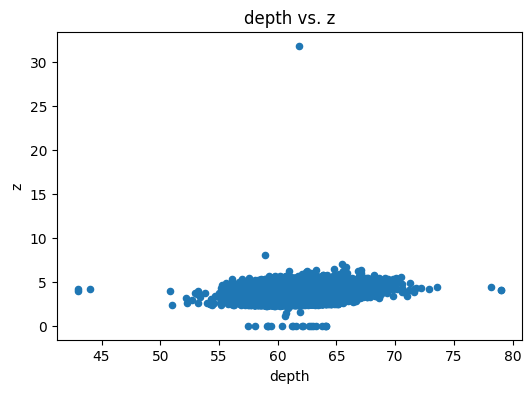

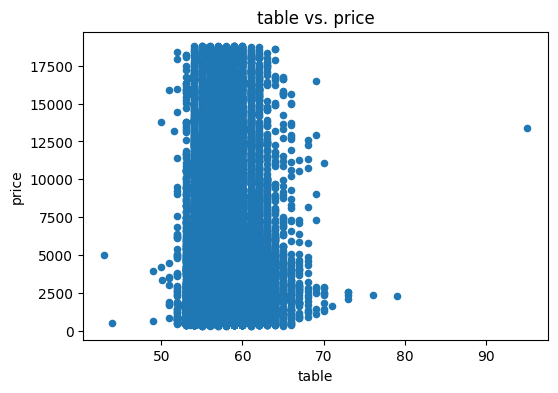

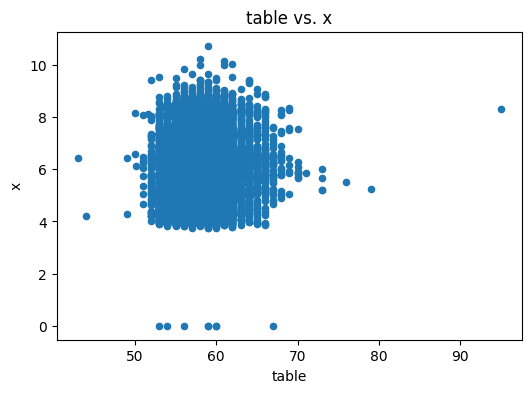

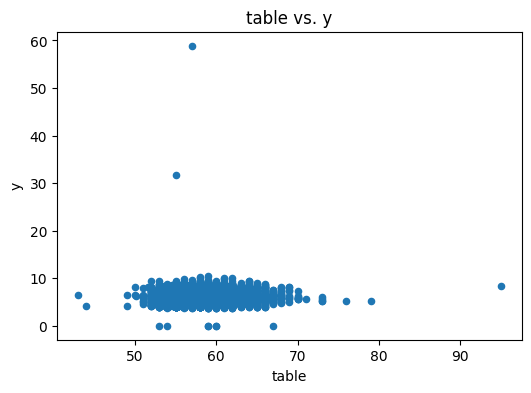

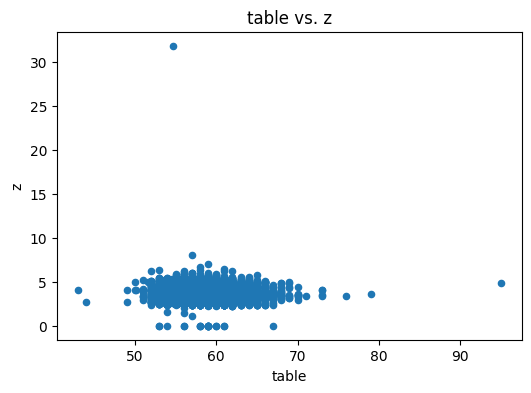

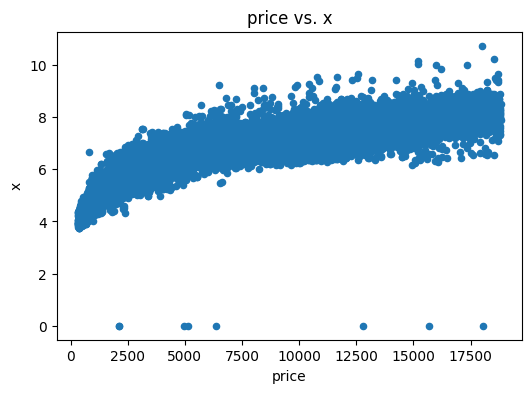

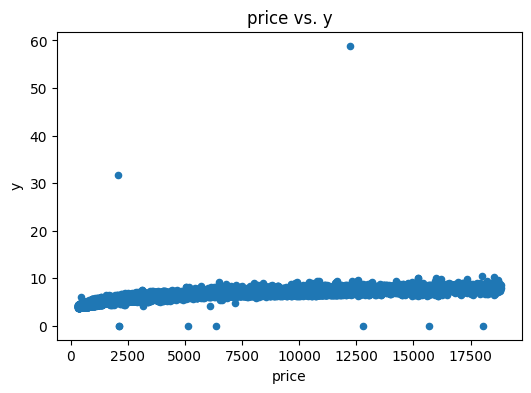

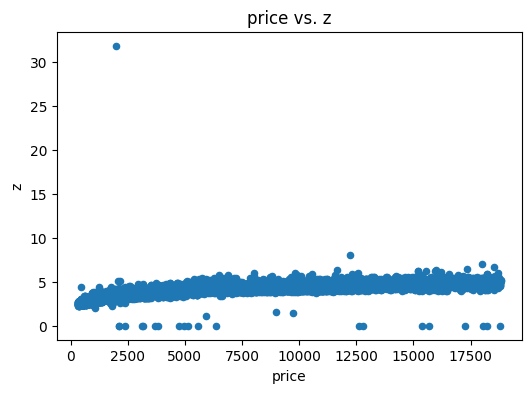

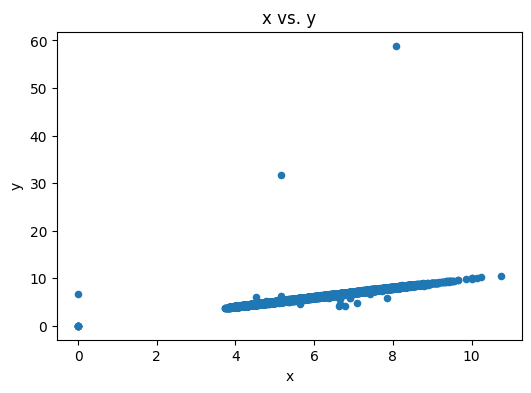

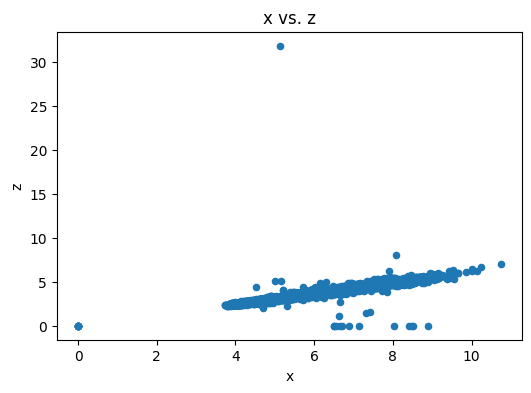

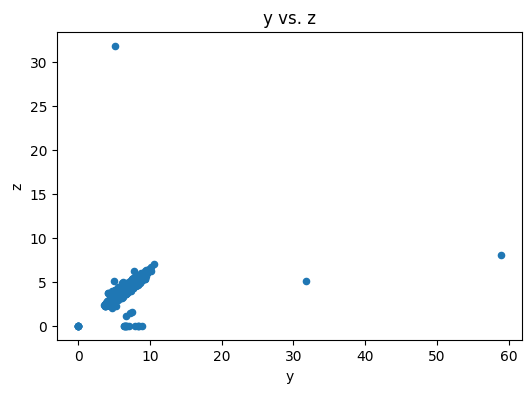

In [464]:
#Quantitative Werte mit Quantitativen Werten vergleichen

quantitative_features = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

# Scatterplots für jede Kombination
for i, feature_x in enumerate(quantitative_features):
    for j, feature_y in enumerate(quantitative_features):
        if i < j:  # Vermeidung von doppelten Kombinationen
            df.plot.scatter(x=feature_x, y=feature_y, figsize=(6, 4))
            plt.title(f"{feature_x} vs. {feature_y}")
            plt.show()


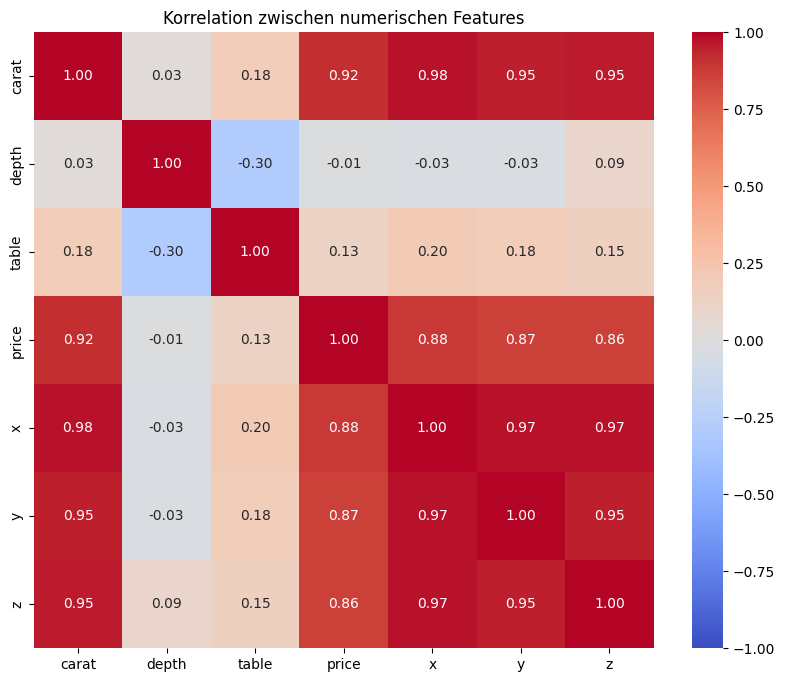

In [465]:
# Korrelationstabelle für numerische Features -> Wie hängen numerische Features miteinander zusammen
# Werte zwischen -1 und +1: 
# +1: Starke positive Korrelation (beide Werte steigen gemeinsam).
# -1: Starke negative Korrelation (ein Wert steigt, der andere sinkt).
# 0: Keine lineare Korrelation.

# Nur numerische Spalten auswählen
numerical_features = df.select_dtypes(include=['float64', 'int64'])

# Korrelationstabelle berechnen
correlation_matrix = numerical_features.corr(method='pearson')

# Korrelationstabelle als Heatmap darstellen
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Korrelation zwischen numerischen Features")
plt.show()



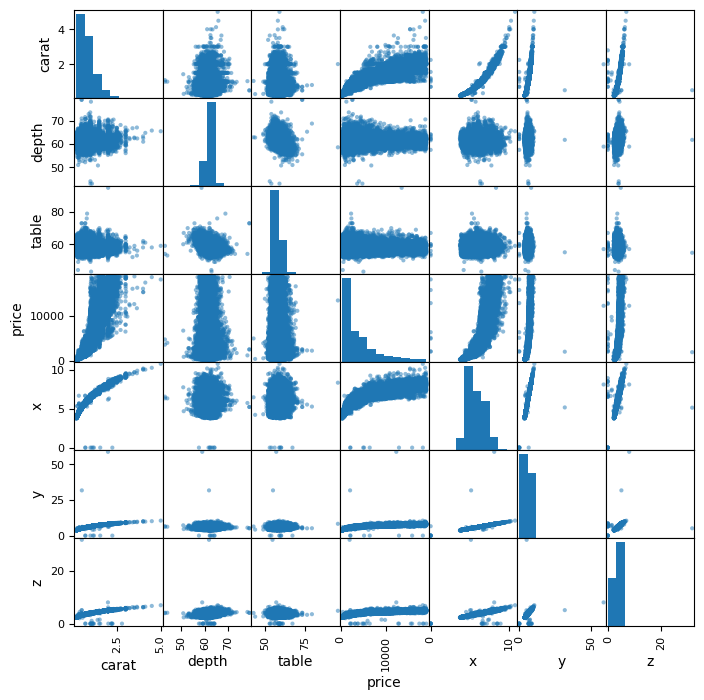

In [466]:
from pandas.plotting import scatter_matrix

# Scatter-Matrix für alle quantitativen Features -> zeigt Scatterplots für alle Kombinationen der quantitativen Features in einer einzigen Visualisierung
# schneller Überblick über mögliche Beziehungen -> Muster und Ausreißer schnell erkennen

scatter_matrix(df[quantitative_features], figsize=(8, 8), diagonal='hist')
plt.show()


In [467]:
#Alle kategorischen Features mit allen numerischen Features vergleichen -> sehen, wie sie miteinander korrellieren
# Auch wenn Preis, Carat und x,y,z am meisten ausschlaggebend für die Preisvorhersage sind, wird vorsichtshalber und zur Übung alles mit allem verglichen
# Liste der numerischen Features
numerical_features = ['price', 'carat', 'depth', 'table', 'x', 'y', 'z']

# Vergleich jeder numerischen Eigenschaft mit den Kategorien
for feature in numerical_features:
    print(f"Statistiken für `{feature}` vs. `cut`:")
    print(df.groupby('cut')[feature].describe())
    print("\n")

    print(f"Statistiken für `{feature}` vs. `color`:")
    print(df.groupby('color')[feature].describe())
    print("\n")

    print(f"Statistiken für `{feature}` vs. `clarity`:")
    print(df.groupby('clarity')[feature].describe())
    print("\n")

# Ergebnis von cut:
# - Premium hat den höchsten Durchschnittspreis (~3336.86), aber auch die höchste Streuung (std: ~2699.23) -> Preise in dieser Kategorie sehr unterschiedlich.
# - Fair hat das höchste durchschnittliche Gewicht (carat ~0.92), gefolgt von Premium (~0.76).
# - Ideal hat geringste durchschnittliche Tiefe, Fair die größte.
# - Fair hat die größten Dimensionen (x, y, z), während Ideal die kleinsten Werte aufweist.
# -> Premium ist teuer, aber die Preisspanne ist breit

# Ergebnis von color:
# - J (gelblich) hat den höchsten Durchschnittspreis, gefolgt von I; D (farblos) den niedrigsten.
# - J hat die höchsten durchschnittlichen Dimensionen (x,y,z
# - D und E haben die kleinsten Dimensionen (x, y, z) und ein geringeres Gewicht und sind günstiger -> untypisch

# Ergebnis von clarity:
# - SI2 hat den höchsten Durchschnittspreis und größte STreuung; IF und VVS1 die niedrigsten.
# - SI2 und I1 haben die höchsten durchschnittlichen Karat-Werte (carat ~0.92 und ~1.10).
# - IF und VVS1 haben die kleinsten Dimensionen und das geringste Gewicht, was ihren niedrigeren Durchschnittspreis erklären könnte.

# All in all:
# -> Alle Kategorien haben ähnliche Maximalpreise, was bedeutet, dass der höchste Preis nicht stark von den kategorischen Features cut, clarity oder color abhängt.
 

Statistiken für `price` vs. `cut`:
             count         mean          std    min      25%     50%      75%  \
cut                                                                             
Fair        1610.0  4358.757764  3560.386612  337.0  2050.25  3282.0  5205.50   
Good        4906.0  3928.864452  3681.589584  327.0  1145.00  3050.5  5028.00   
Ideal      21551.0  3457.541970  3808.401172  326.0   878.00  1810.0  4678.50   
Premium    13791.0  4584.257704  4349.204961  326.0  1046.00  3185.0  6296.00   
Very good  12082.0  3981.759891  3935.862161  336.0   912.00  2648.0  5372.75   

               max  
cut                 
Fair       18574.0  
Good       18788.0  
Ideal      18806.0  
Premium    18823.0  
Very good  18818.0  


Statistiken für `price` vs. `color`:
         count         mean          std    min     25%     50%      75%  \
color                                                                      
D       6775.0  3169.954096  3356.590935  357.0   911.0  18

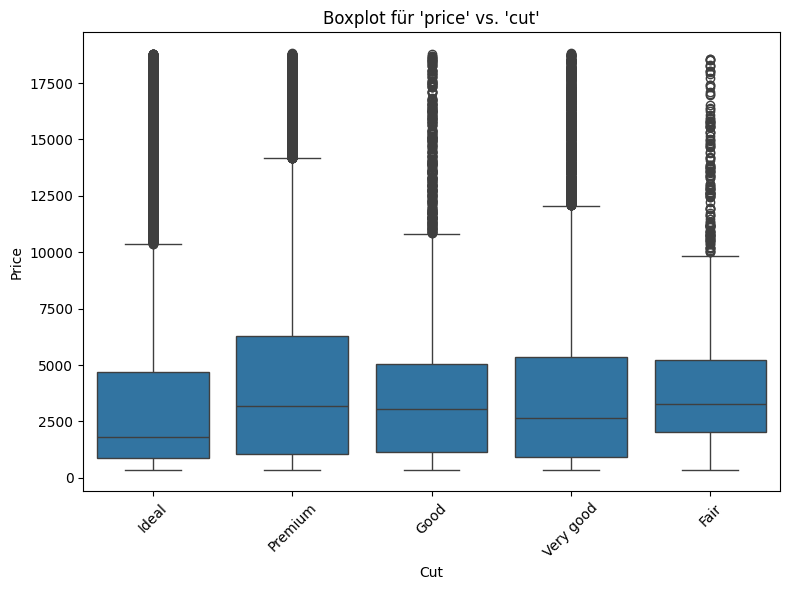

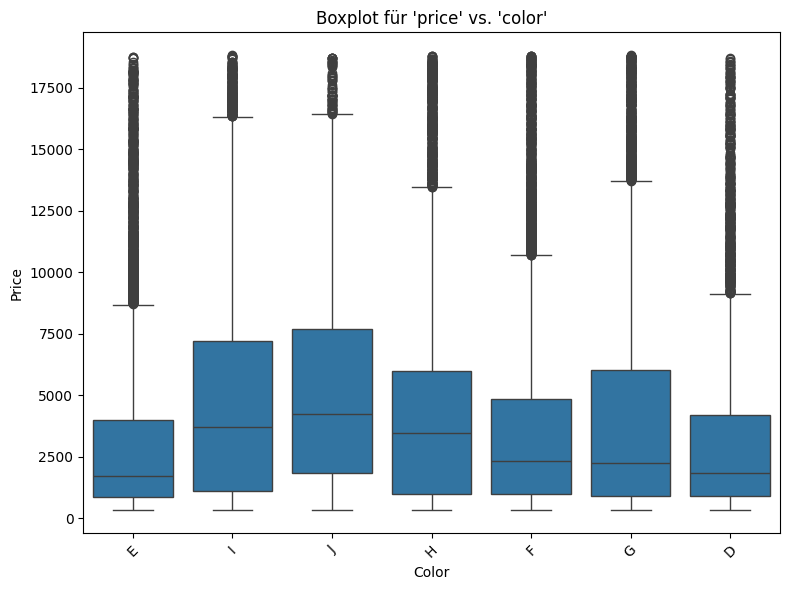

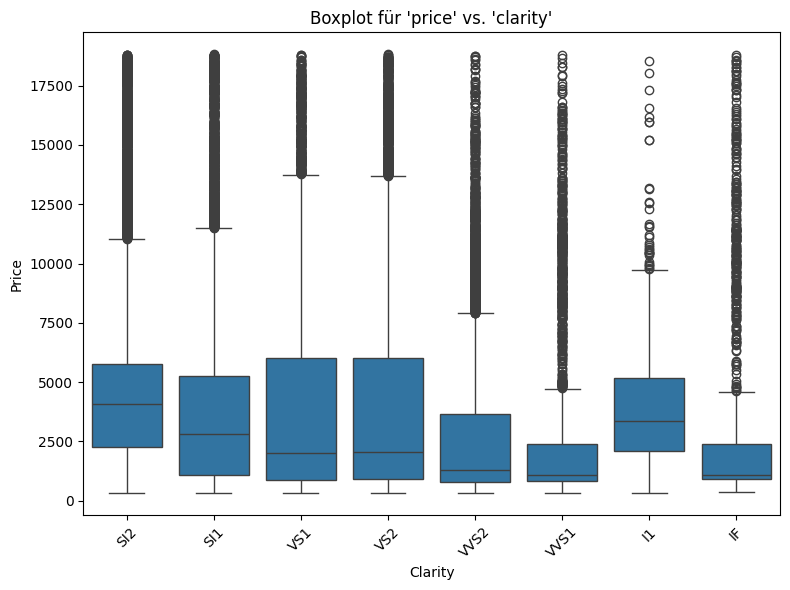

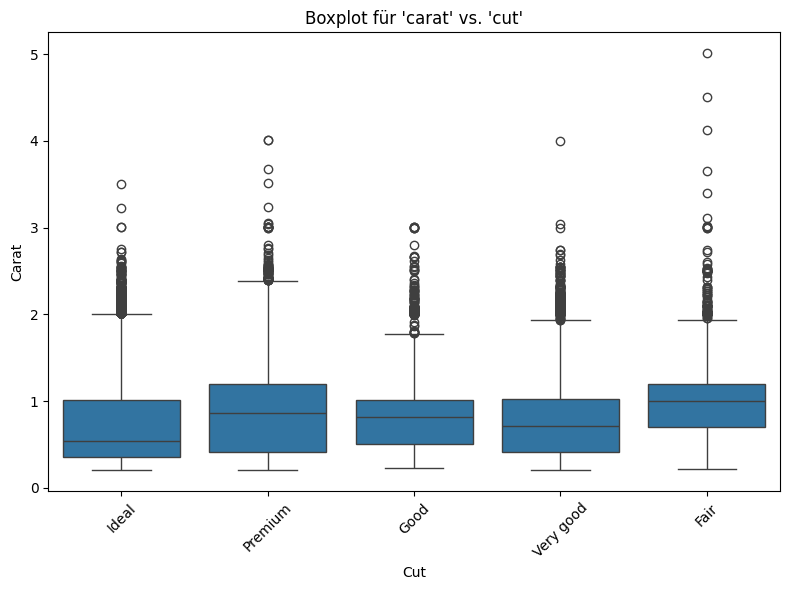

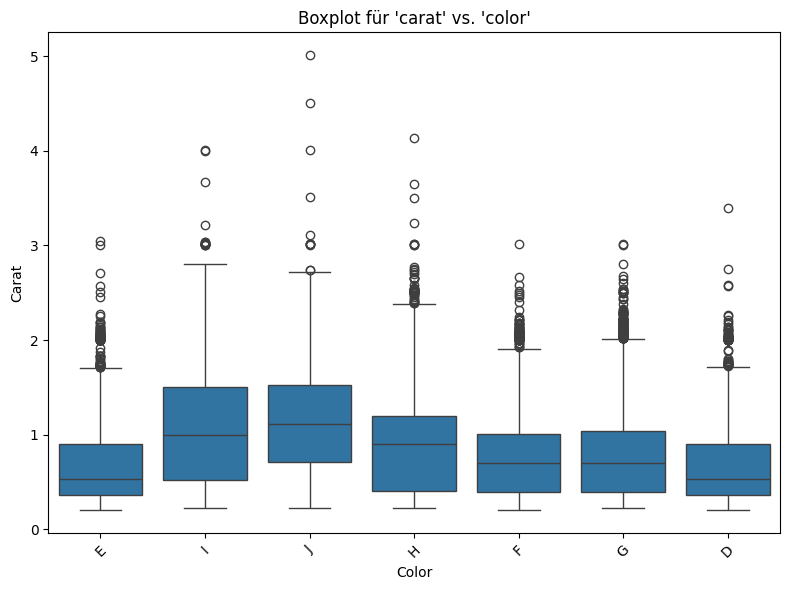

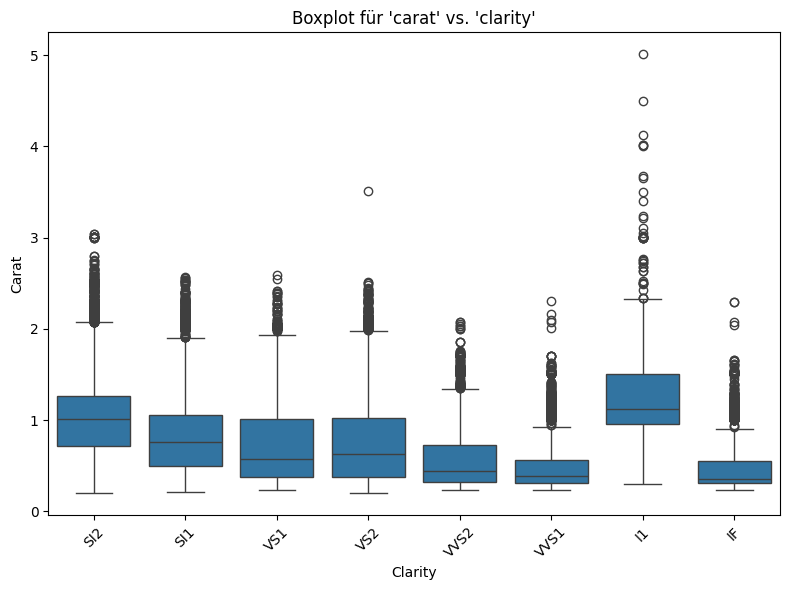

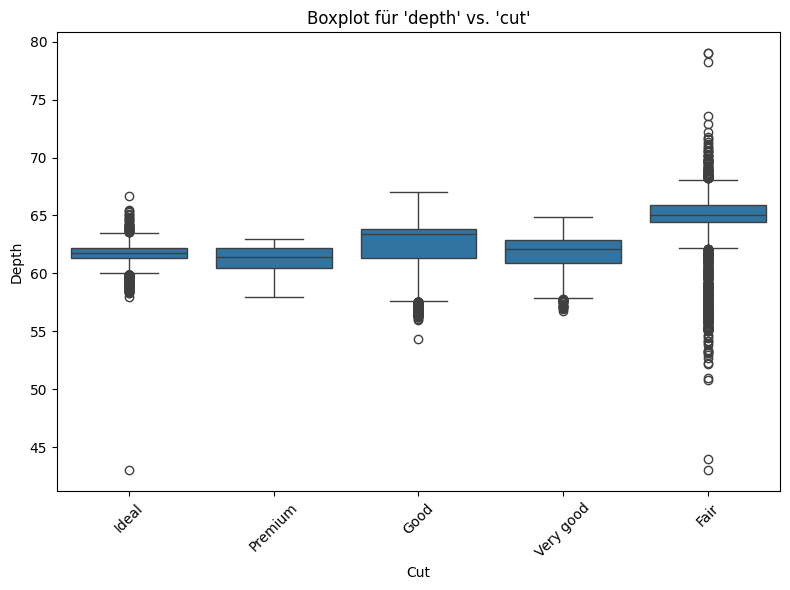

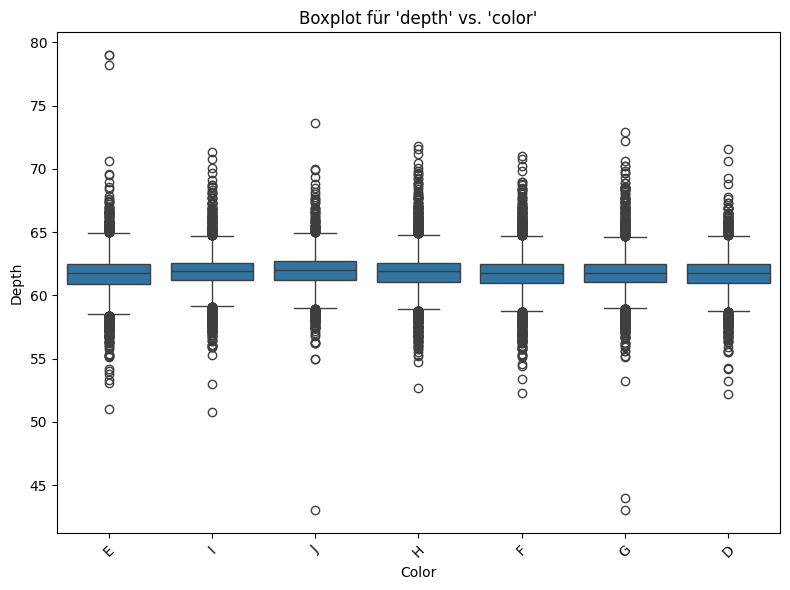

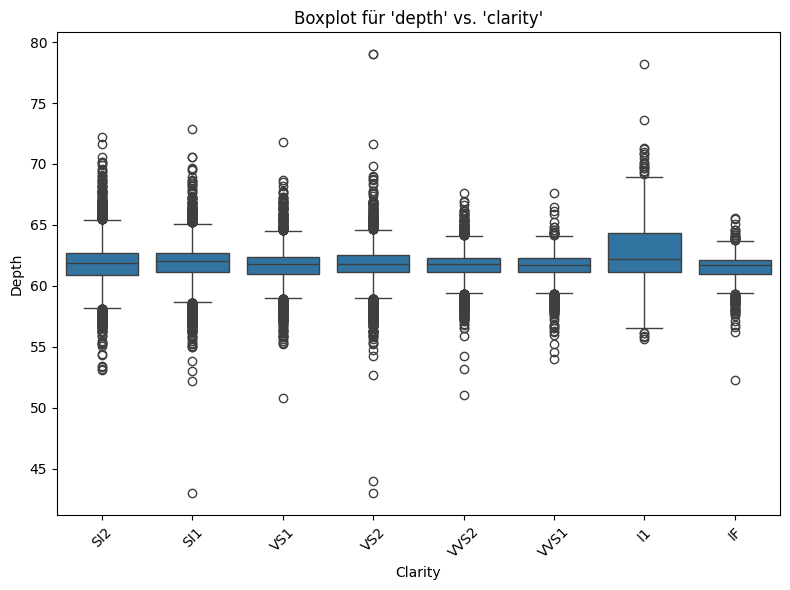

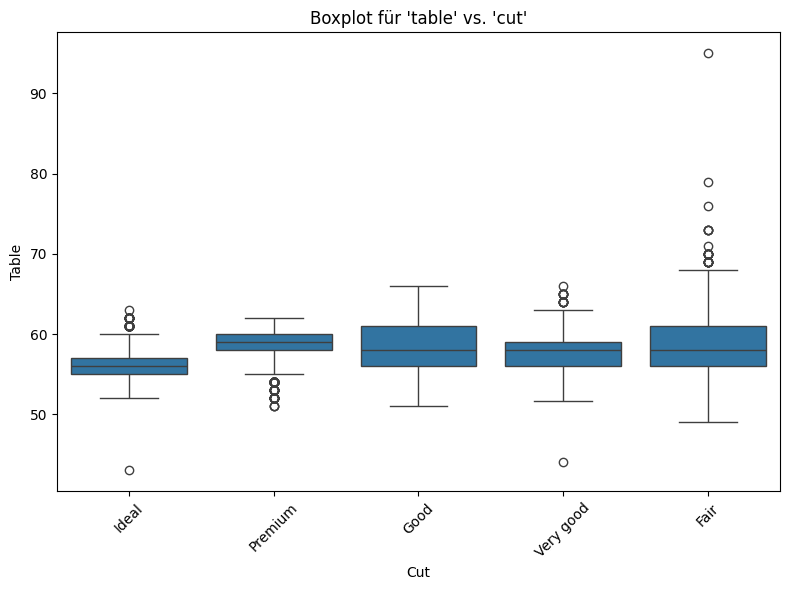

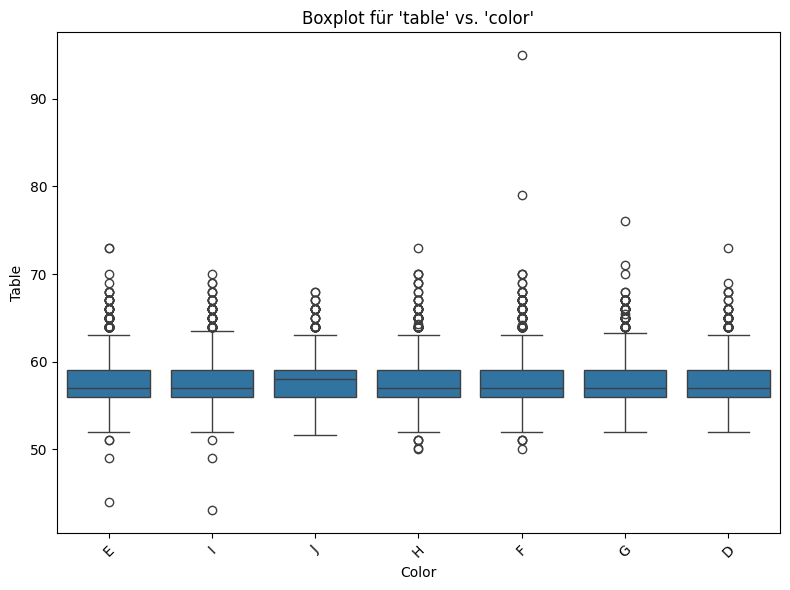

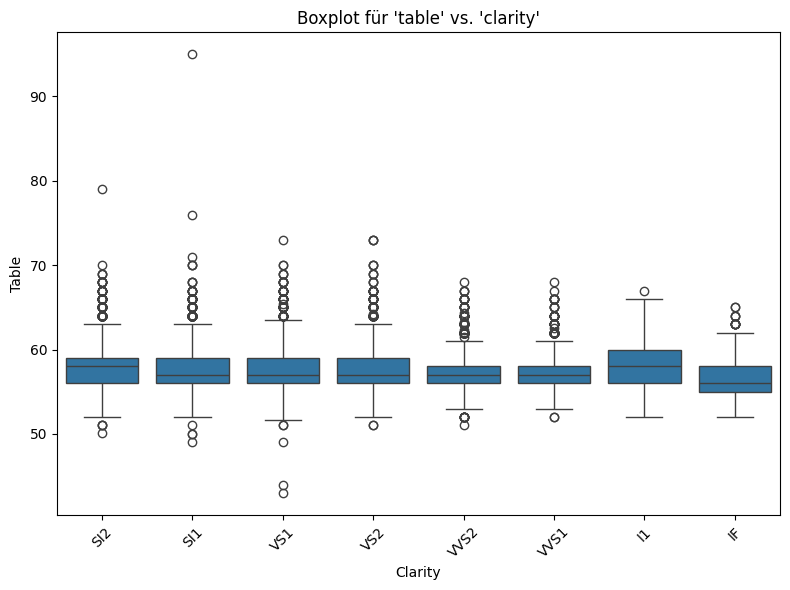

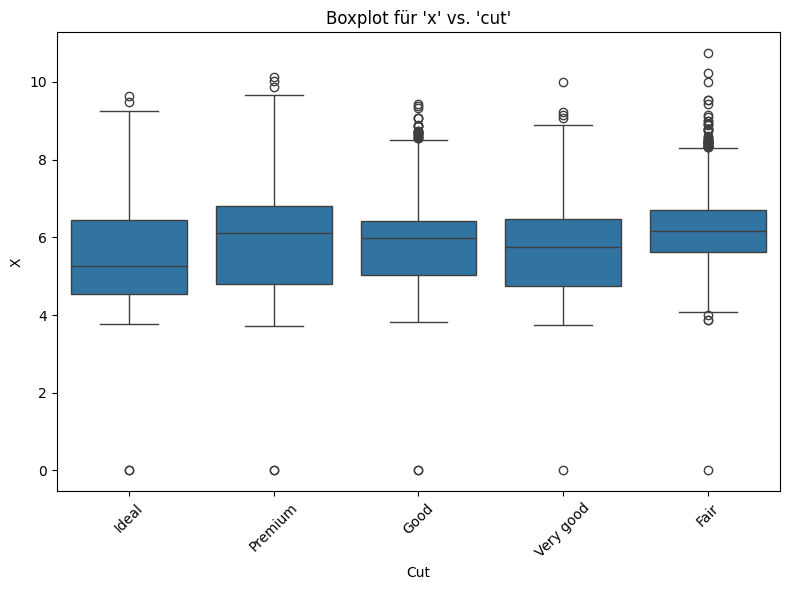

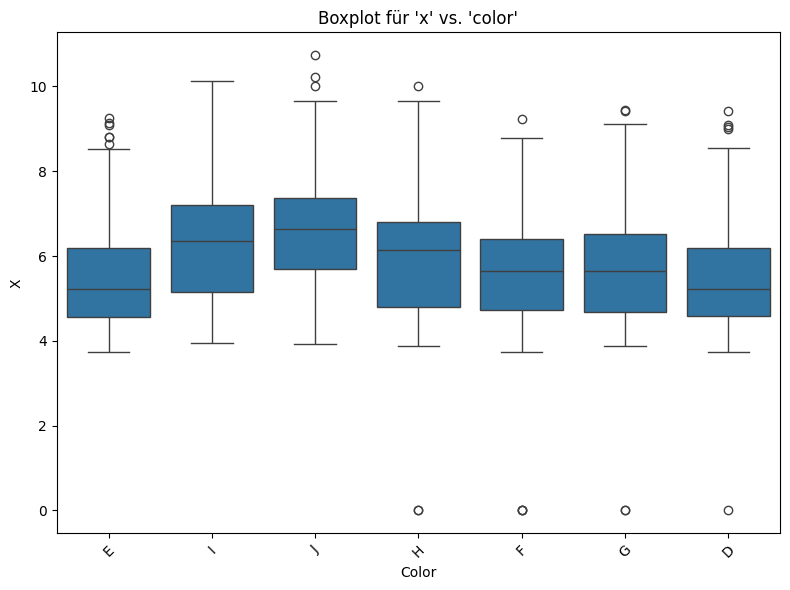

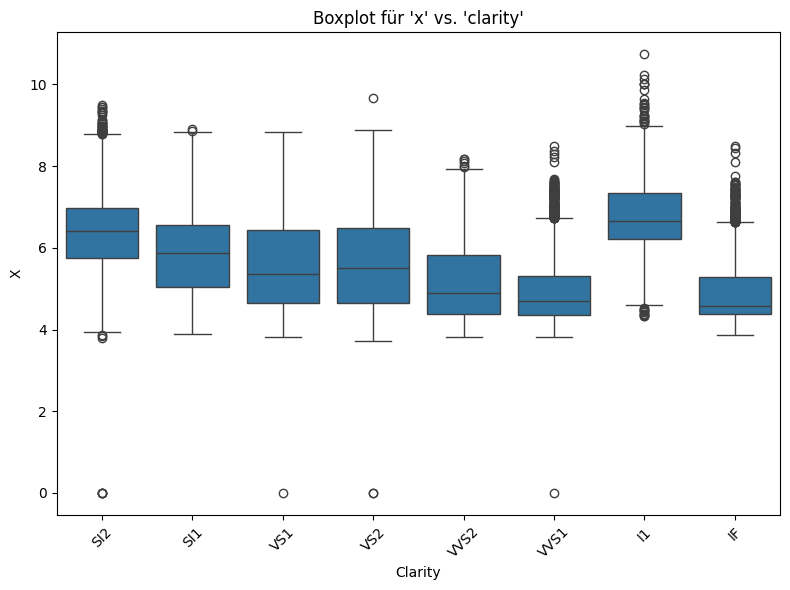

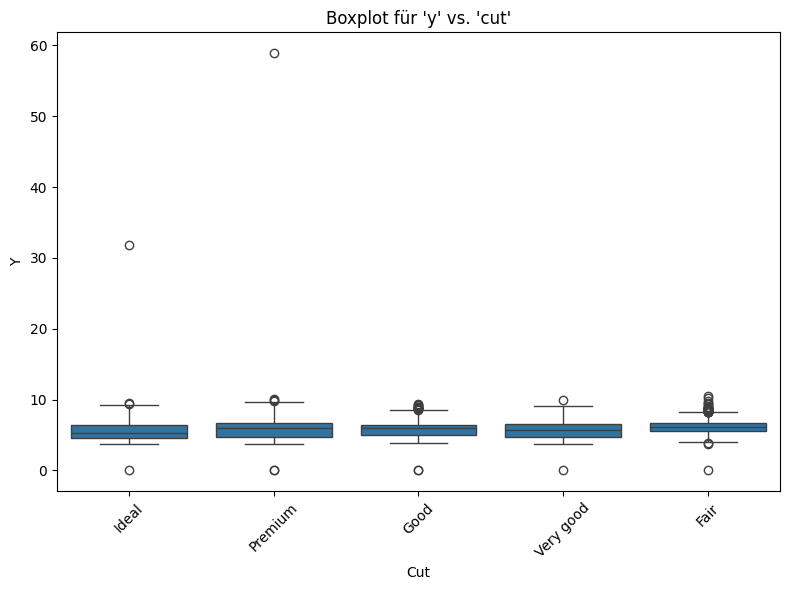

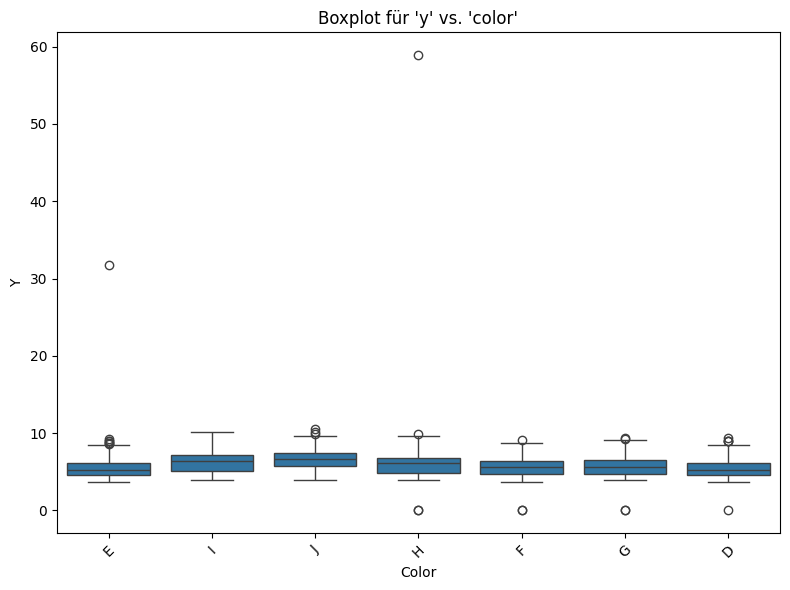

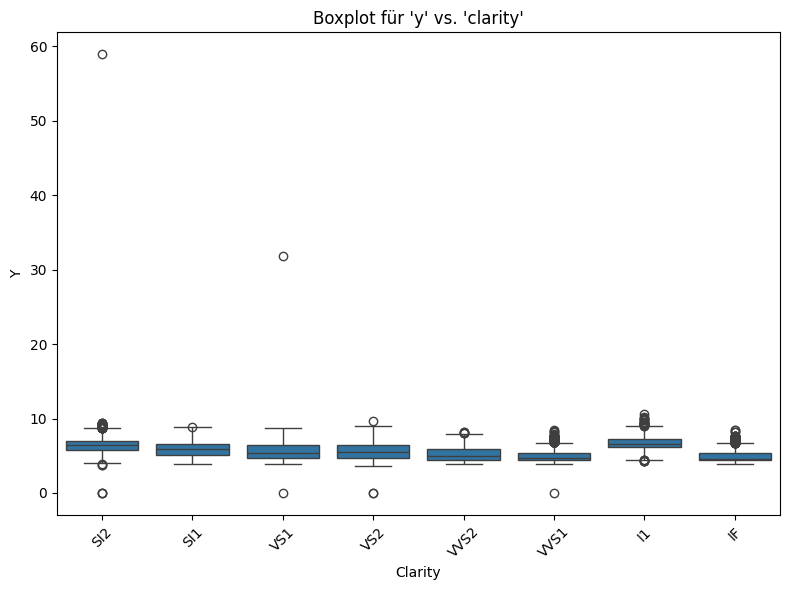

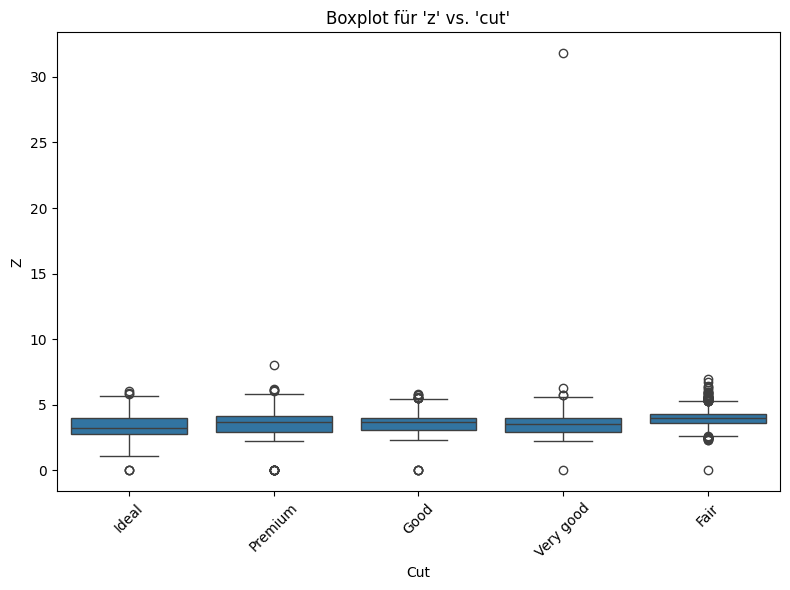

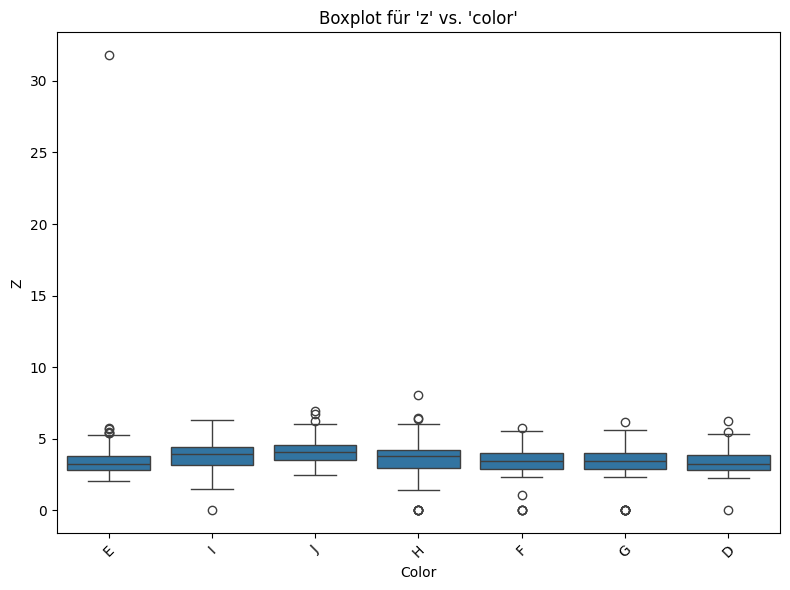

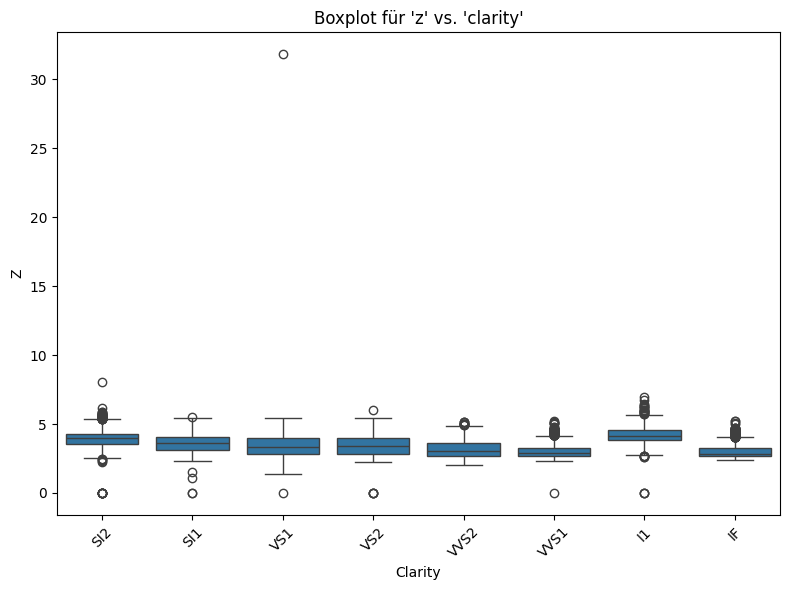

In [468]:
#Boxplots für alle kategorischen Features mit numerischen (Visuelle Darstellung der Tabelle drüber)
# Liste der numerischen Features
numerical_features = ['price', 'carat', 'depth', 'table', 'x', 'y', 'z']

# Liste der kategorialen Features
categorical_features = ['cut', 'color', 'clarity']

# Boxplots erstellen
for numerical_feature in numerical_features:
    for categorical_feature in categorical_features:
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=df, x=categorical_feature, y=numerical_feature)
        plt.title(f"Boxplot für '{numerical_feature}' vs. '{categorical_feature}'")
        plt.xlabel(categorical_feature.capitalize())
        plt.ylabel(numerical_feature.capitalize())
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

In [469]:
# Kopie von der Originaldatei erstellen, bevor man was drauf speichert/ändert 
# am besten vor der Ausreißerprüfung,  da es den Zustand der Daten vor der Bereinigung festhält
df_cleaned = df.copy()

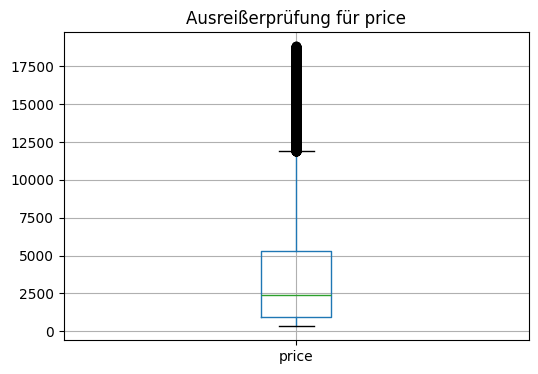

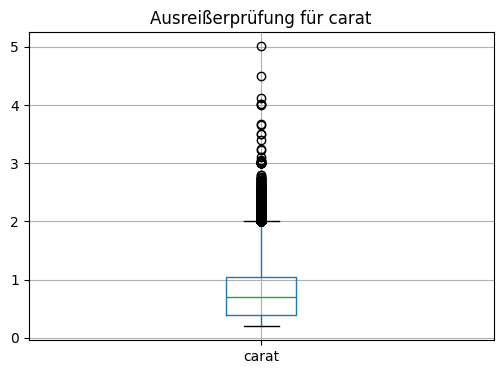

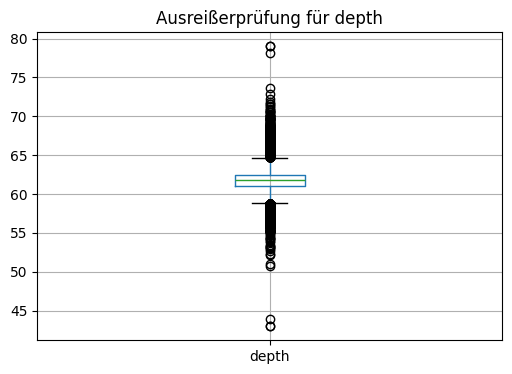

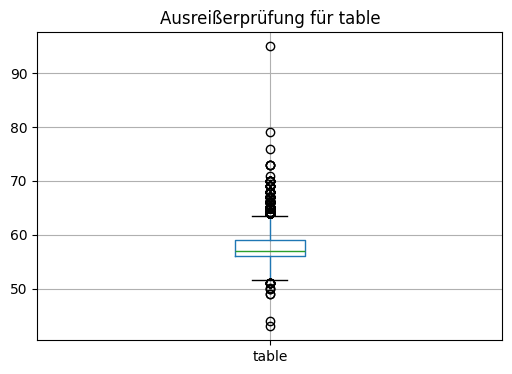

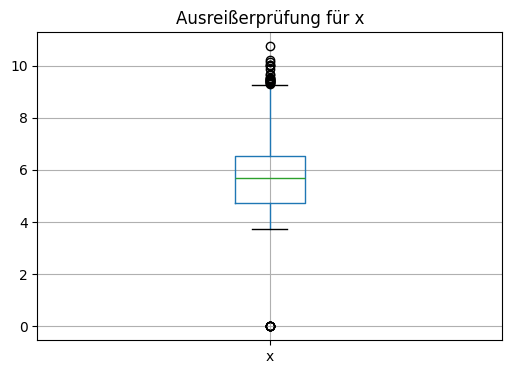

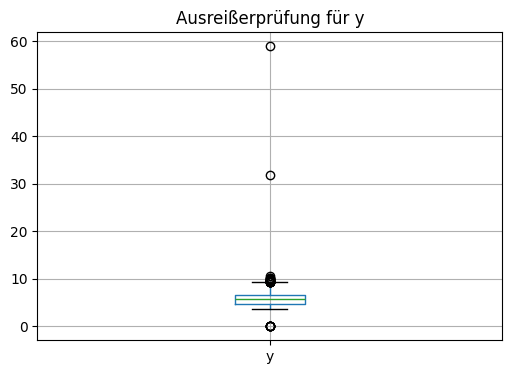

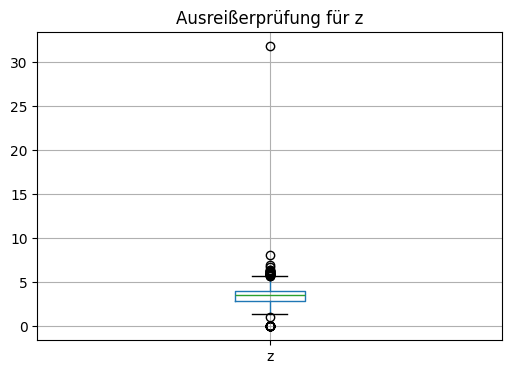

In [470]:
# Boxplot für Ausreißer mit Pandas erstellt (hier wurden einfach zur Übung die Boxplots mit Pandas, statt mit Seaborn erstellt)
# Für kategorische Features wird nicht auf Ausreißer geprüft/Daten bereinigt, da wir keine Missing Values haben oder Werte die stark vom Rest abweichen
# Liste der numerischen Features
numerical_features = ['price', 'carat', 'depth', 'table', 'x', 'y', 'z']

# Boxplots für jedes numerische Feature (hier werden sicherheitshalber alle numerischen Features geprüft, auch wenn depth und table wenig relevant sind)
for feature in numerical_features:
    df.boxplot(column=[feature], figsize=(6, 4))
    plt.title(f"Ausreißerprüfung für {feature}")
    plt.show()


In [471]:
# Bei diesem Schritt werden die Ausreißer entfernt
# Anzahl der Daten vor der Bereinigung speichern
df_before = len(df)

# Für jedes numerische Feature die IQR-Methode anwenden
for feature in numerical_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    # Grenzen definieren
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Ausreißer entfernen
    df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

# Anzahl der verbleibenden Daten nach der Bereinigung ausgeben
print("Anzahl der Daten vor der Bereinigung:", df_before)
print("Anzahl der Daten nach der BEreinigung:", len(df))


Anzahl der Daten vor der Bereinigung: 53940
Anzahl der Daten nach der BEreinigung: 47091


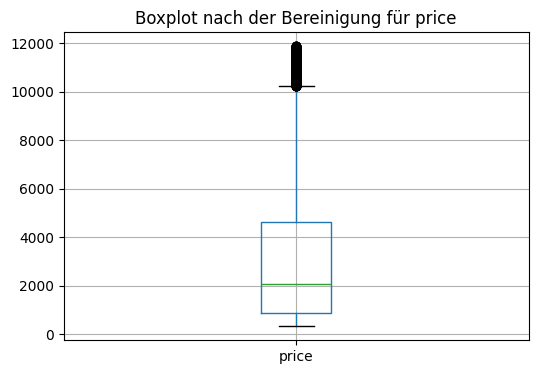

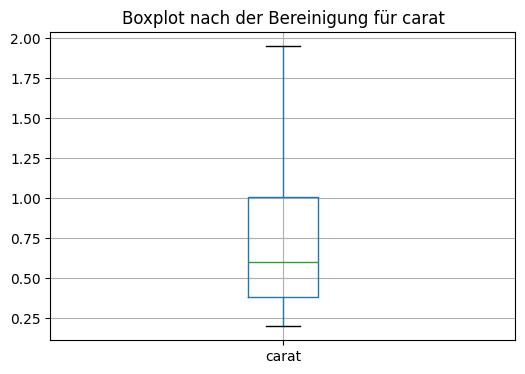

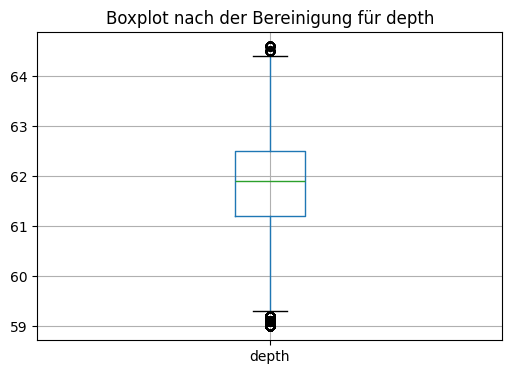

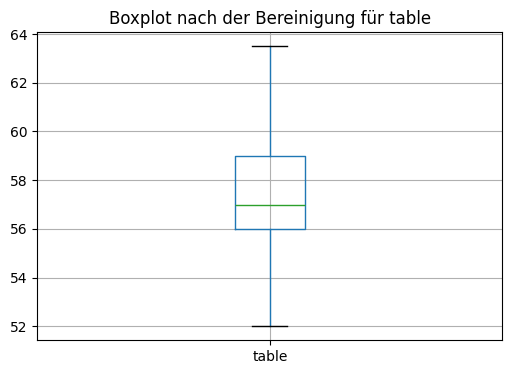

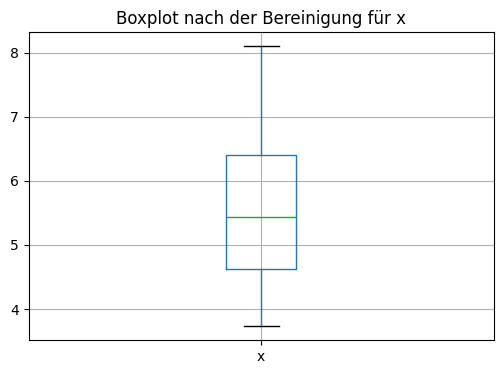

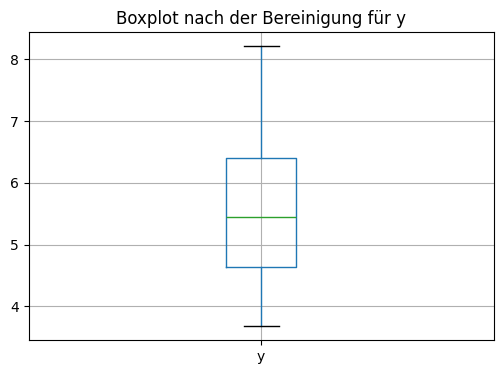

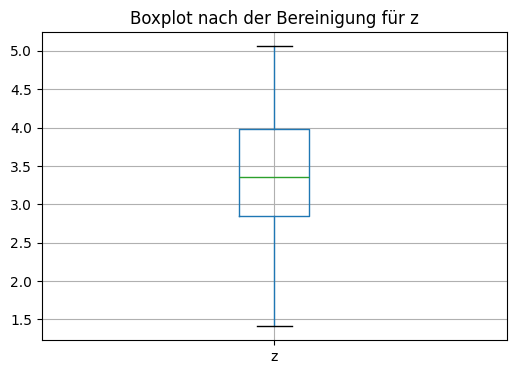

In [472]:
# Ab hier wird die Analyse erneut durchgeführt! -> nach der Bereinigung
# Boxplots nach der Bereinigung für numerische Features, um zu sehen ob die Bereinigung fubnktioniert hat -> wenige Ausreißer sollten sichtbar sein
for feature in numerical_features:
    df.boxplot(column=[feature], figsize=(6, 4))
    plt.title(f"Boxplot nach der Bereinigung für {feature}")
    plt.show()

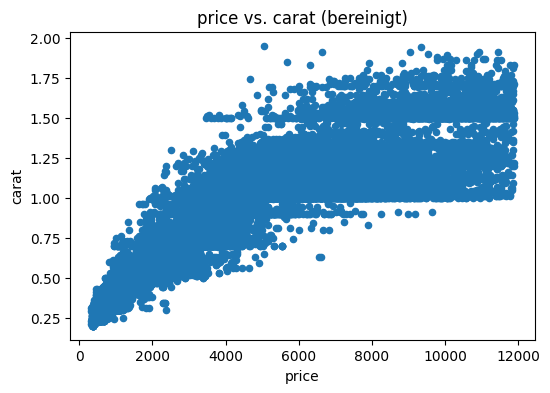

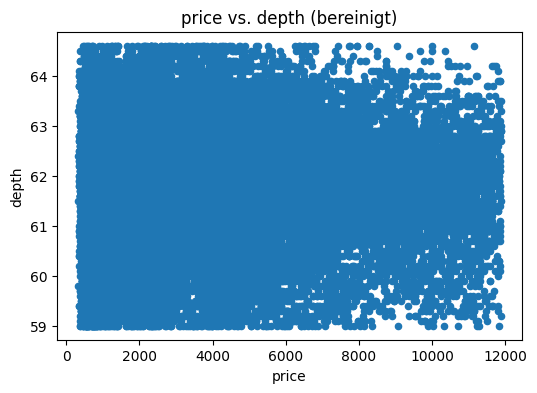

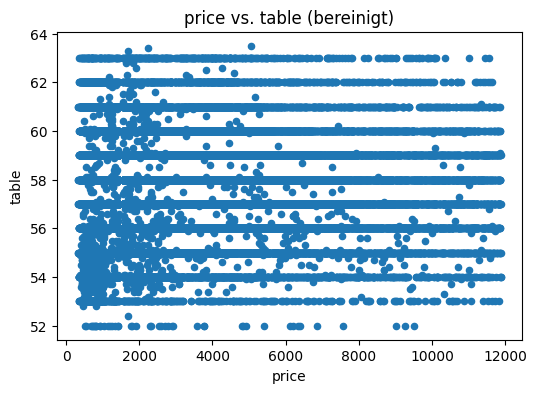

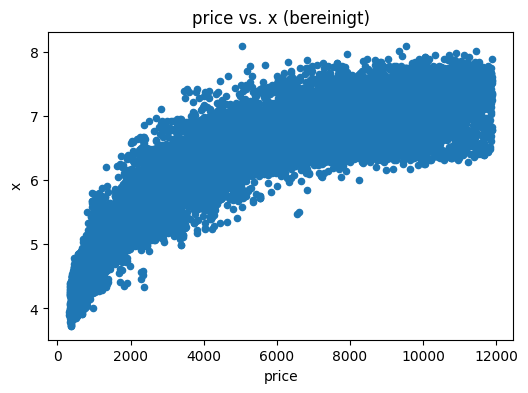

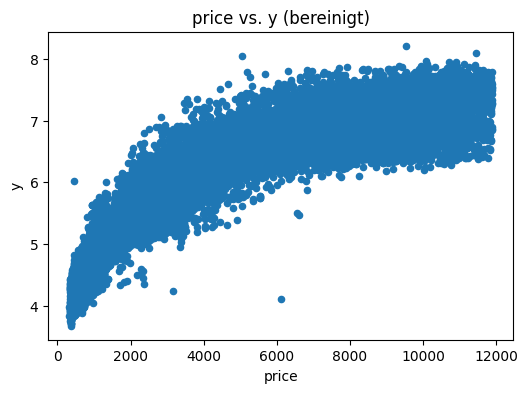

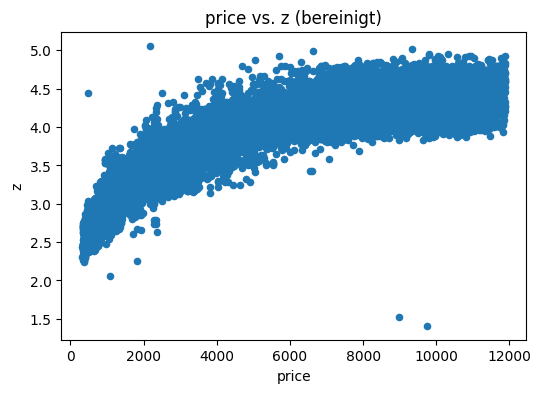

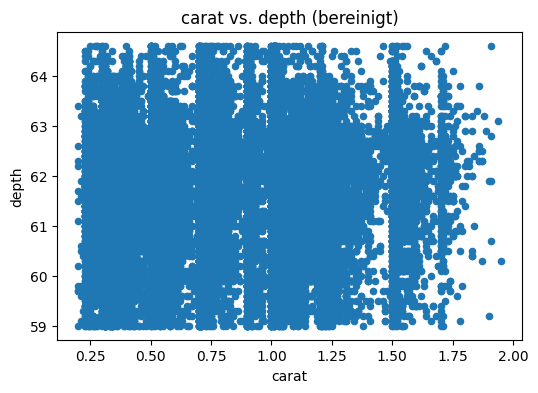

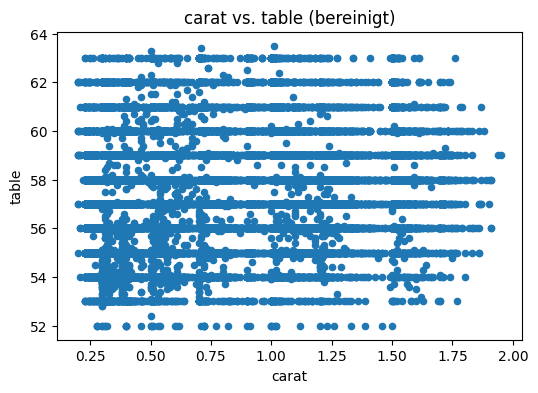

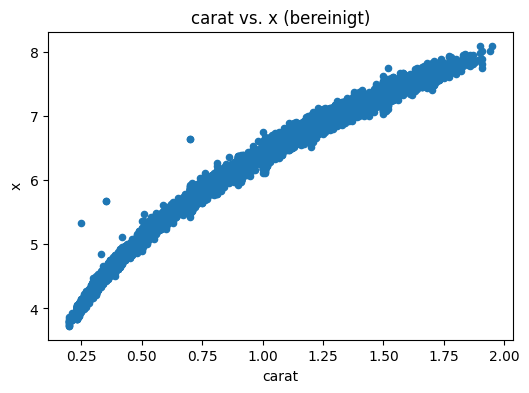

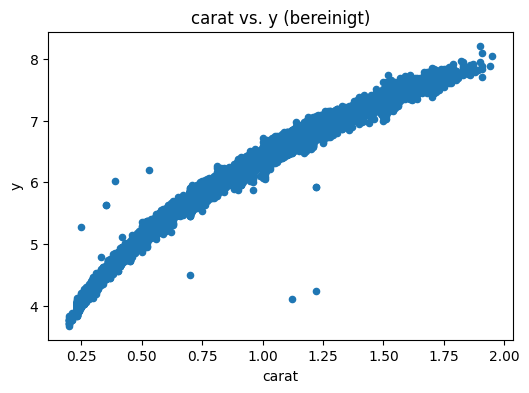

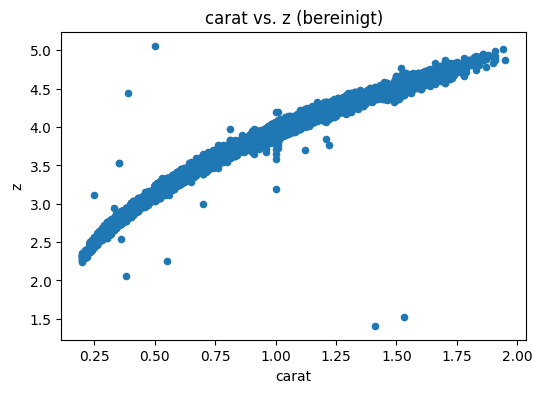

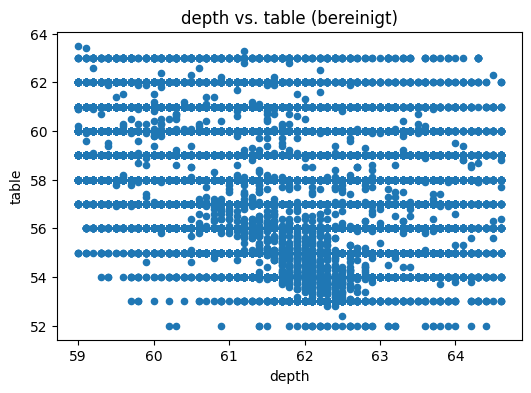

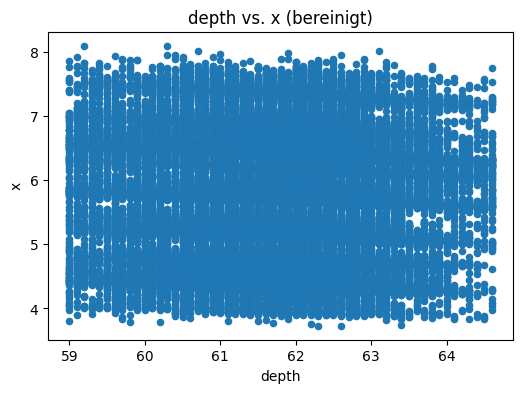

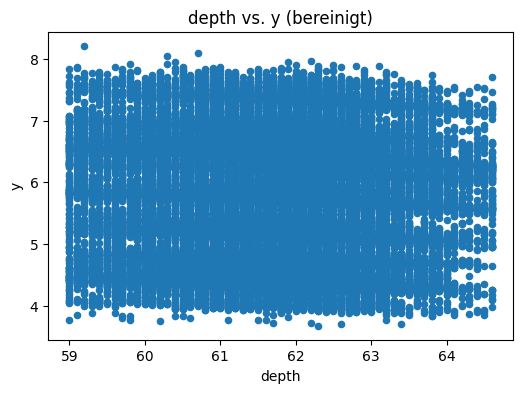

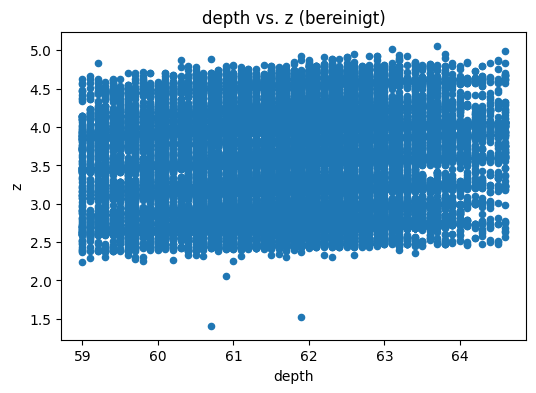

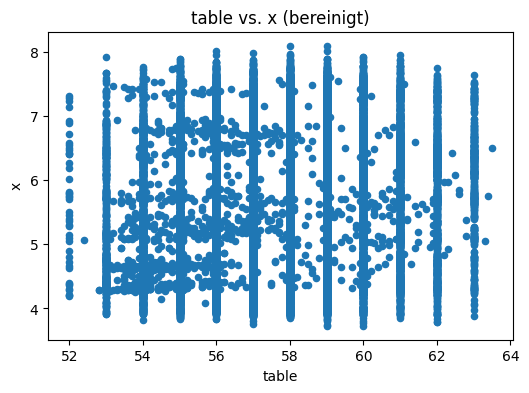

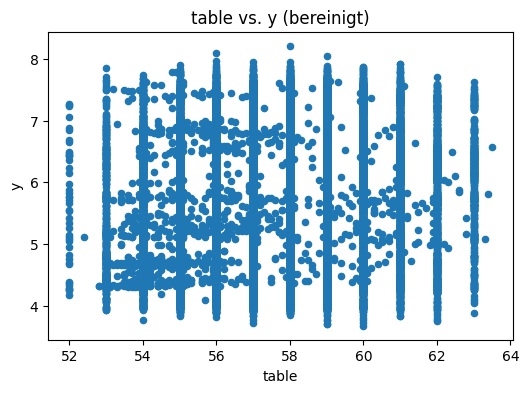

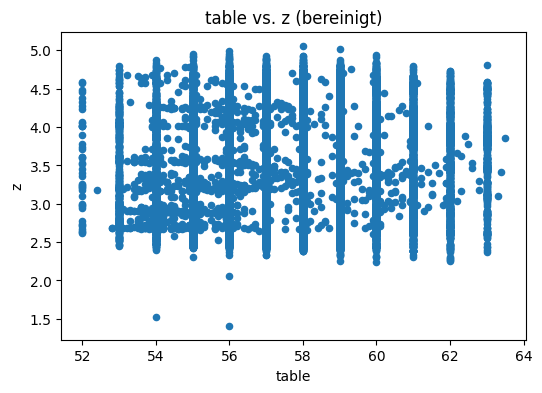

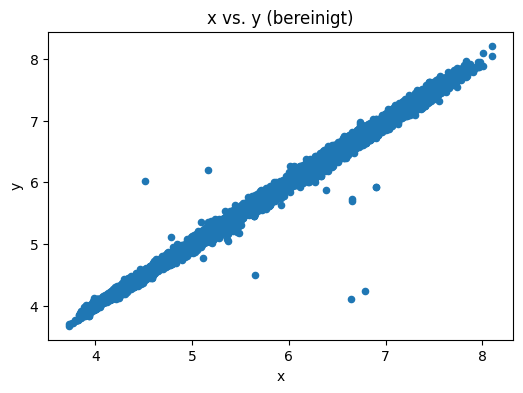

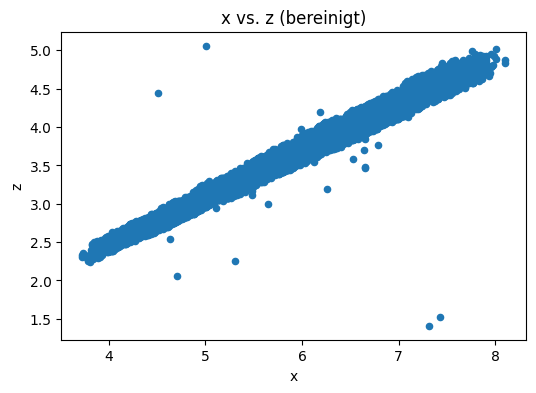

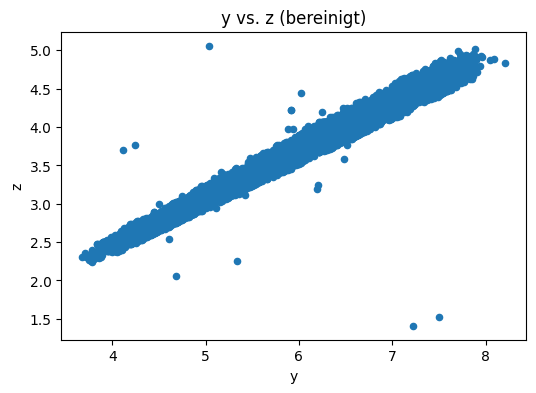

In [473]:
# Scatterplots nach der Bereinigung erstellen
for i, feature_x in enumerate(numerical_features):
    for j, feature_y in enumerate(numerical_features):
        if i < j:  # Keine doppelten Kombinationen
            df.plot.scatter(x=feature_x, y=feature_y, figsize=(6, 4))
            plt.title(f"{feature_x} vs. {feature_y} (bereinigt)")
            plt.show()


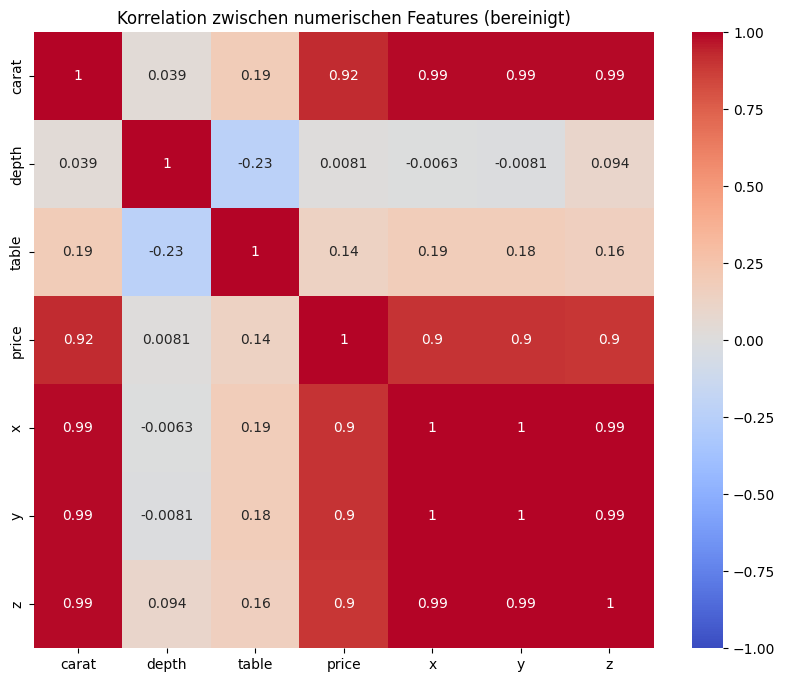

In [474]:
# Korrelationstabelle neu berechnen - nach der Bereinigung
# Nur numerische Spalten auswählen
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Korrelationstabelle neu berechnen
correlation_matrix = numerical_df.corr()

# Heatmap erstellen
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Korrelation zwischen numerischen Features (bereinigt)")
plt.show()



In [475]:
# Nach der Bereinigung: nochmal alle Kategorischen Features mit den Numerischen Features vergleichen
# Hier: nur statistische Berechnung/Tabelle, da sich Werte wie Median, Streuung usw. geändert haben
# Liste der numerischen Features
numerical_features = ['price', 'carat', 'depth', 'table', 'x', 'y', 'z']

# Liste der kategorialen Features
categorical_features = ['cut', 'color', 'clarity']

# Vergleich jeder numerischen Eigenschaft mit den Kategorien (bereinigt)
for numerical_feature in numerical_features:
    for categorical_feature in categorical_features:
        print(f"Statistiken für '{numerical_feature}' vs. '{categorical_feature}' (bereinigt):")
        print(df.groupby(categorical_feature)[numerical_feature].describe())
        print("\n")


Statistiken für 'price' vs. 'cut' (bereinigt):
             count         mean          std    min      25%     50%     75%  \
cut                                                                            
Fair         268.0  3680.720149  2312.329688  496.0  2035.75  3165.5  4776.5   
Good        3696.0  3192.517587  2547.567163  335.0   904.00  2608.0  4559.0   
Ideal      20319.0  2793.972538  2678.879474  326.0   855.00  1680.0  3897.0   
Premium    11944.0  3471.180258  2870.956968  326.0   972.00  2544.0  5197.0   
Very good  10864.0  3219.200110  2726.011279  336.0   859.00  2398.5  4727.0   

               max  
cut                 
Fair       11154.0  
Good       11869.0  
Ideal      11883.0  
Premium    11883.0  
Very good  11879.0  


Statistiken für 'price' vs. 'color' (bereinigt):
        count         mean          std    min      25%     50%      75%  \
color                                                                      
D      6123.0  2642.891720  2417.300556  3

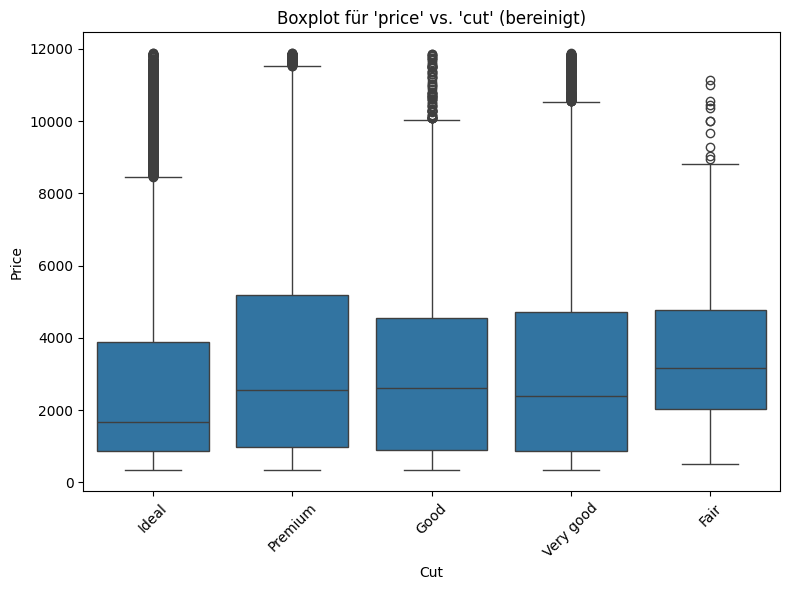

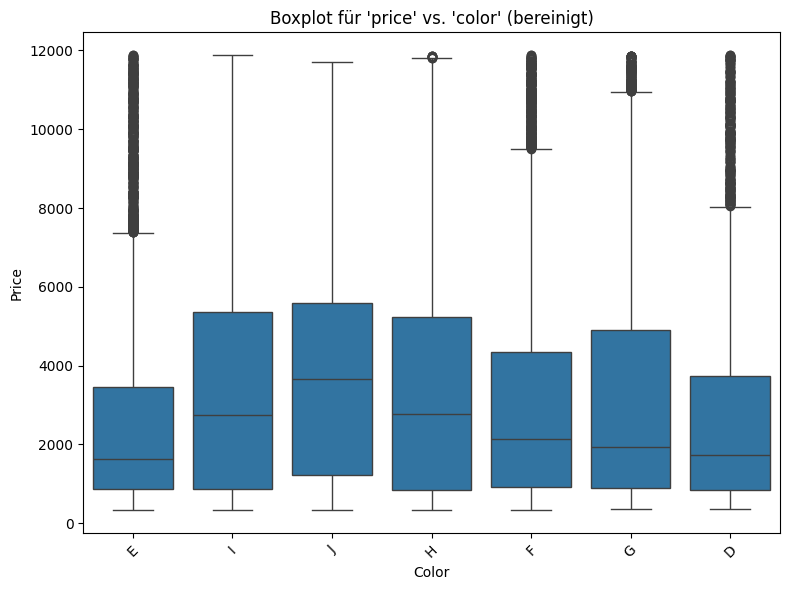

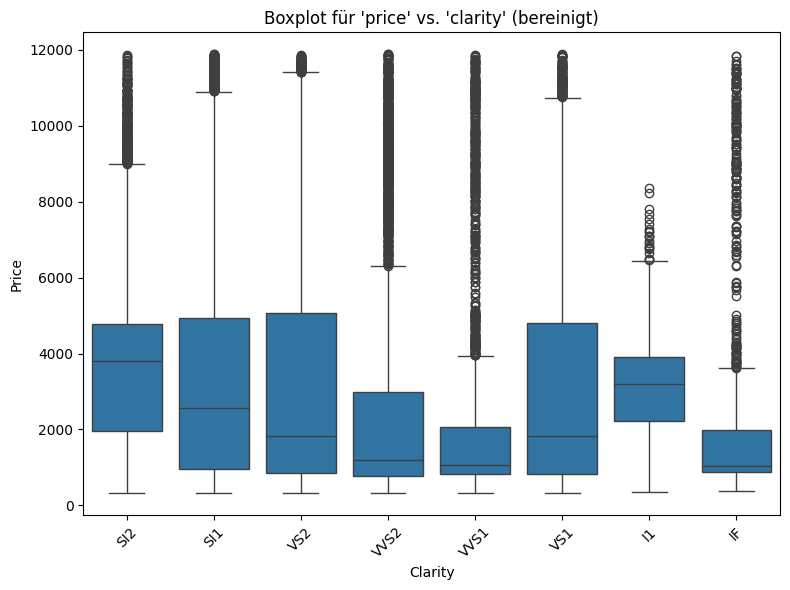

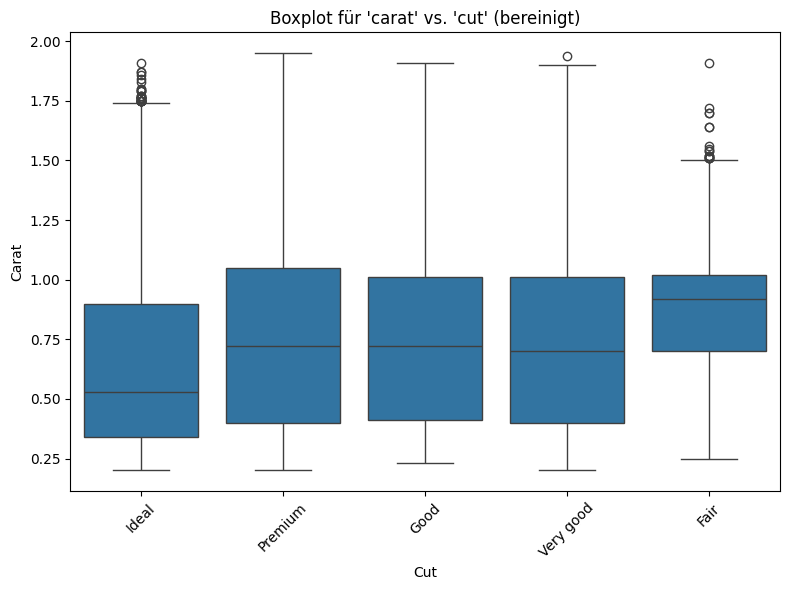

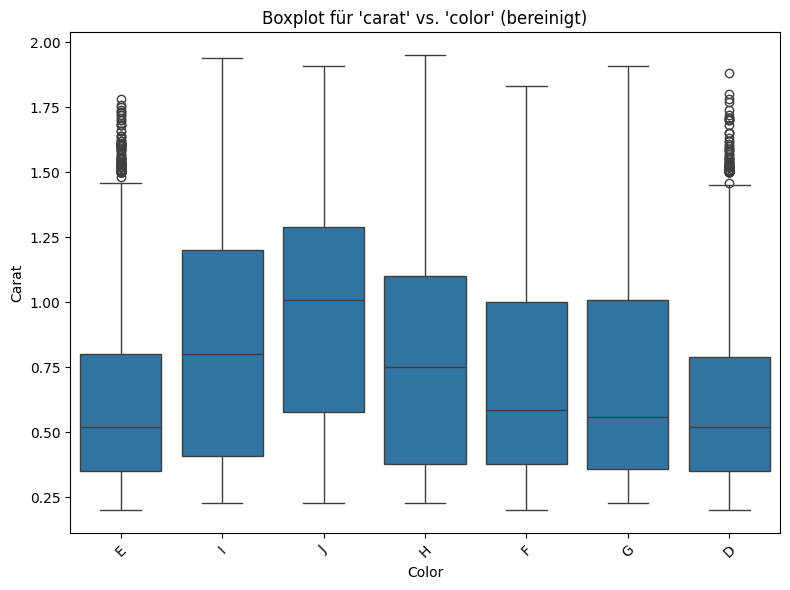

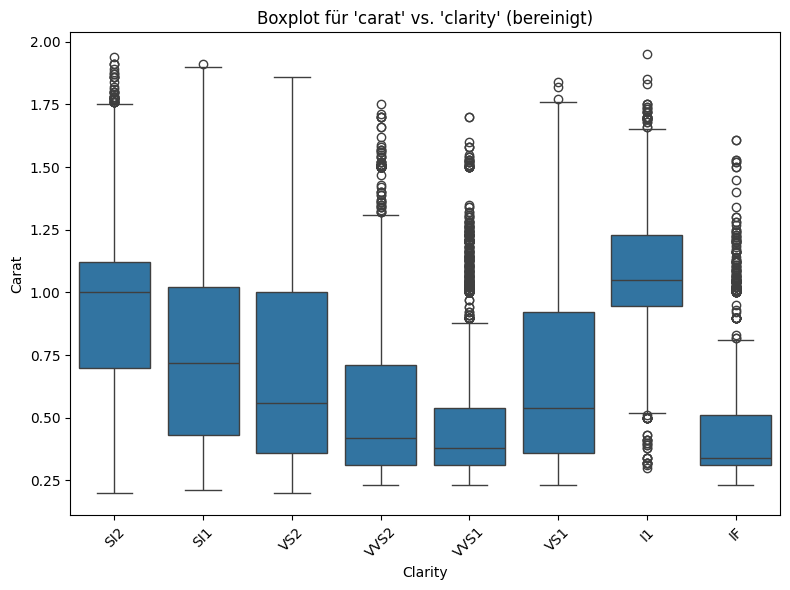

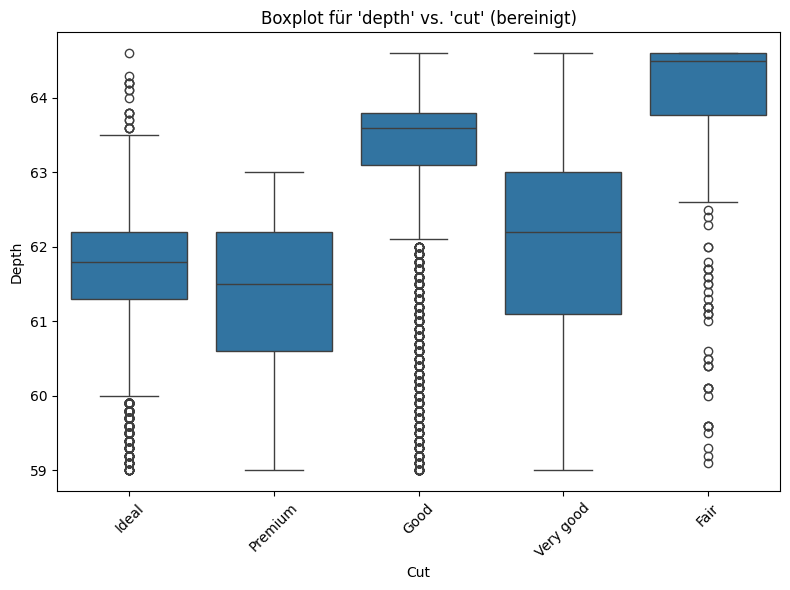

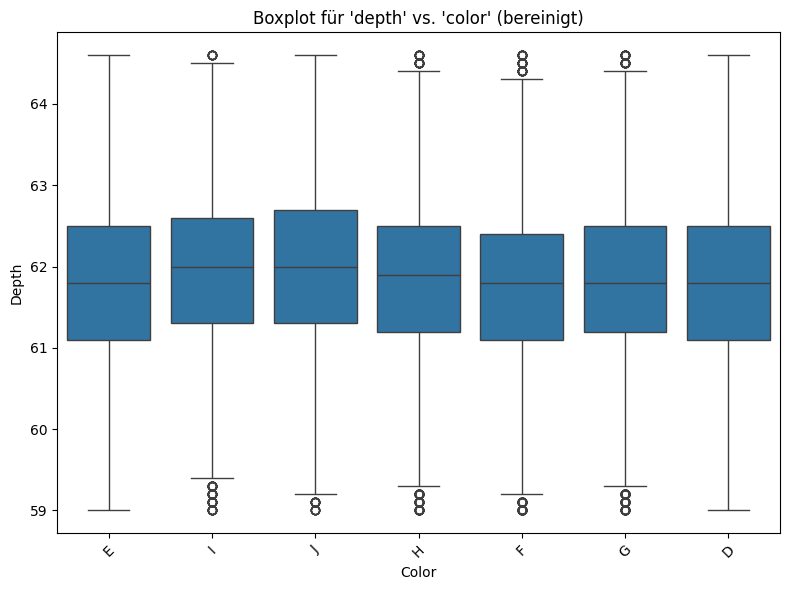

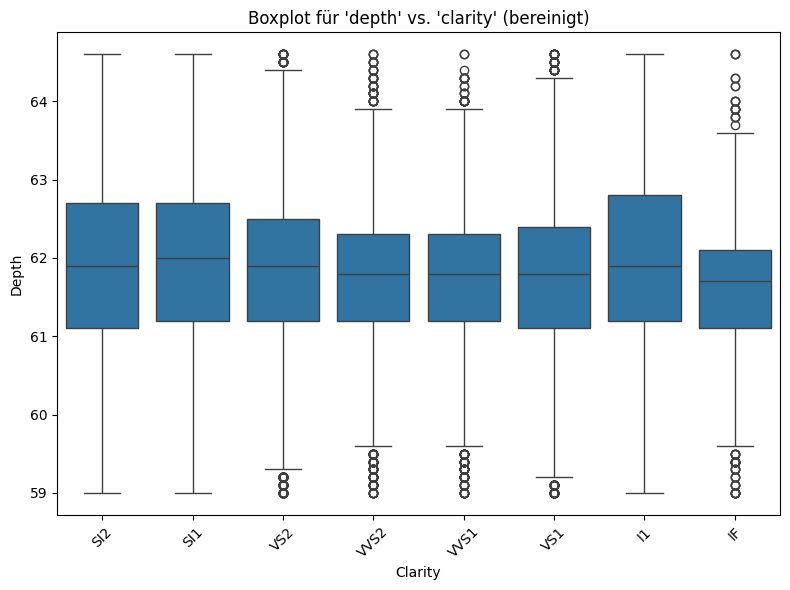

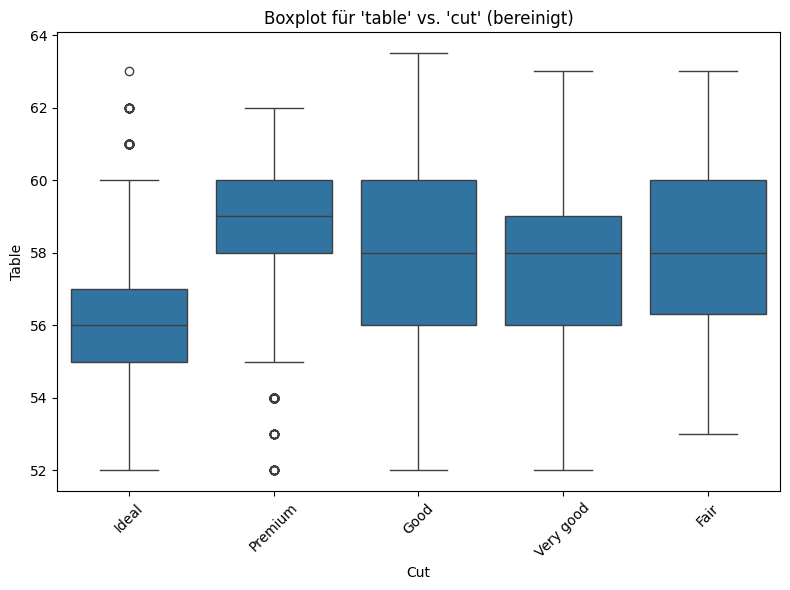

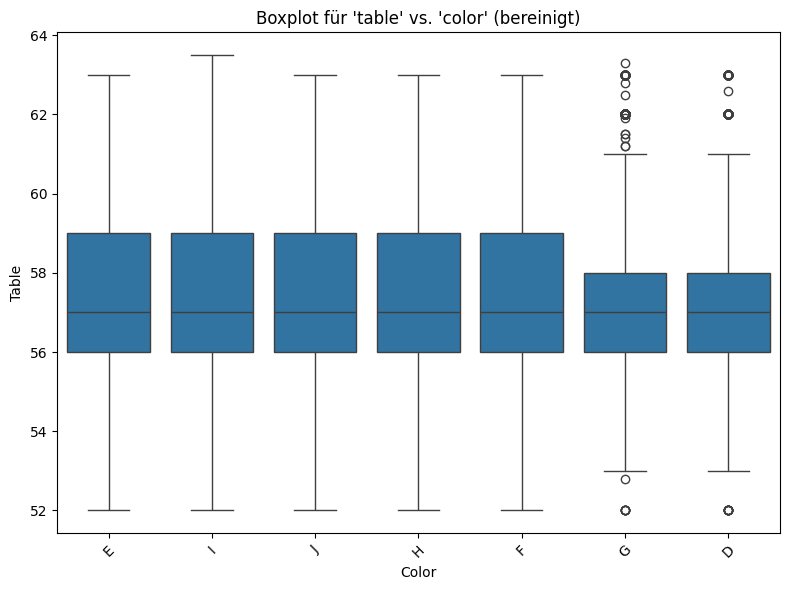

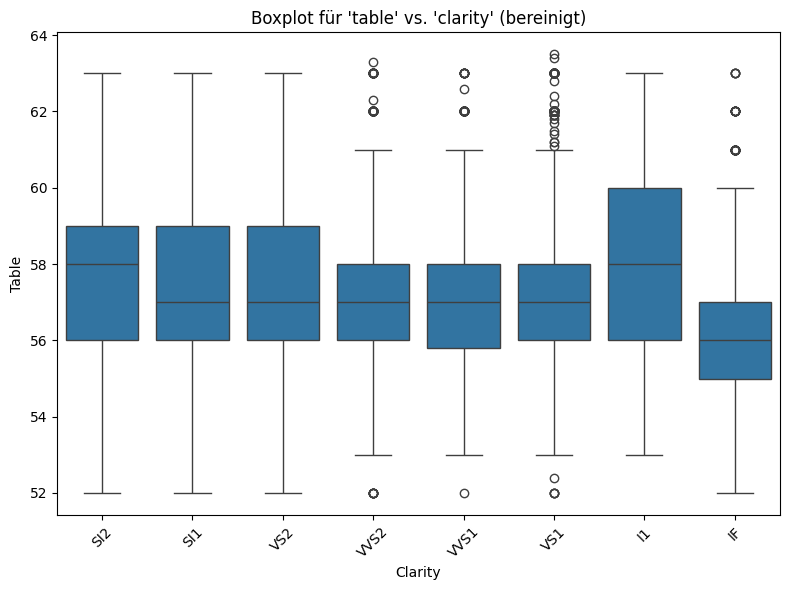

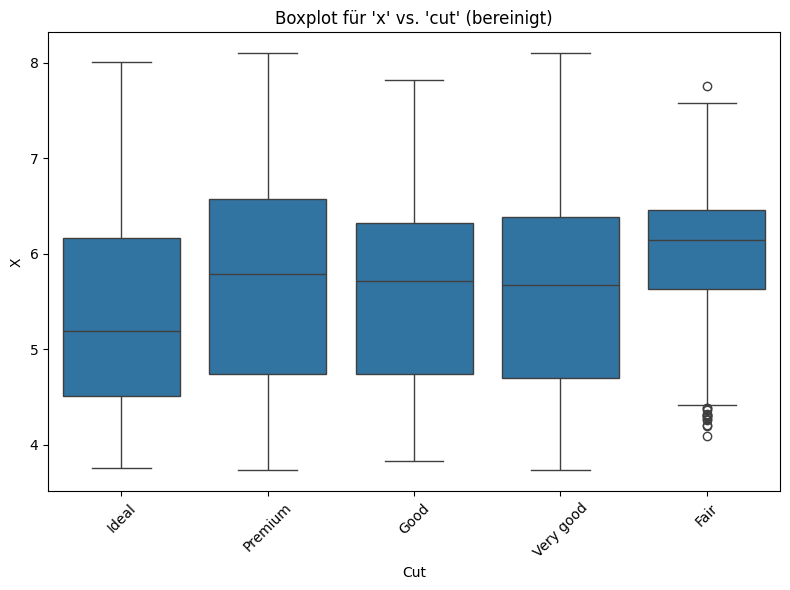

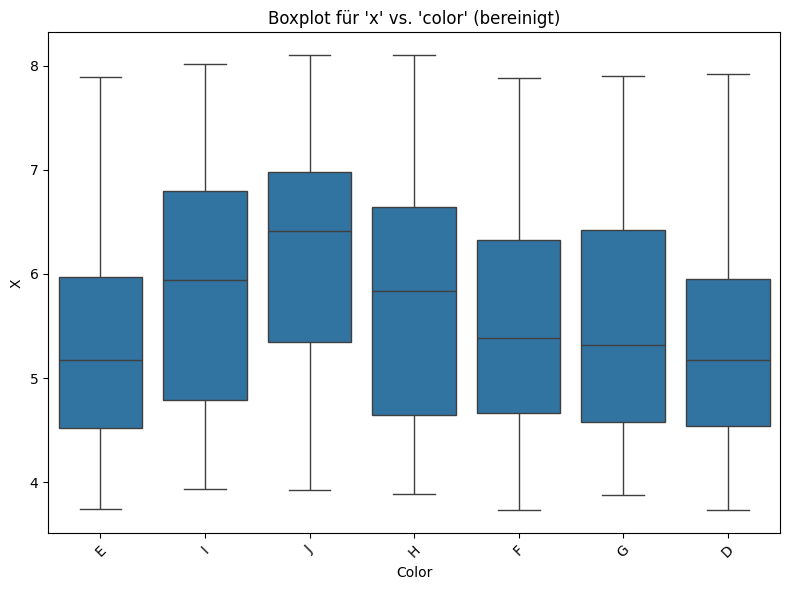

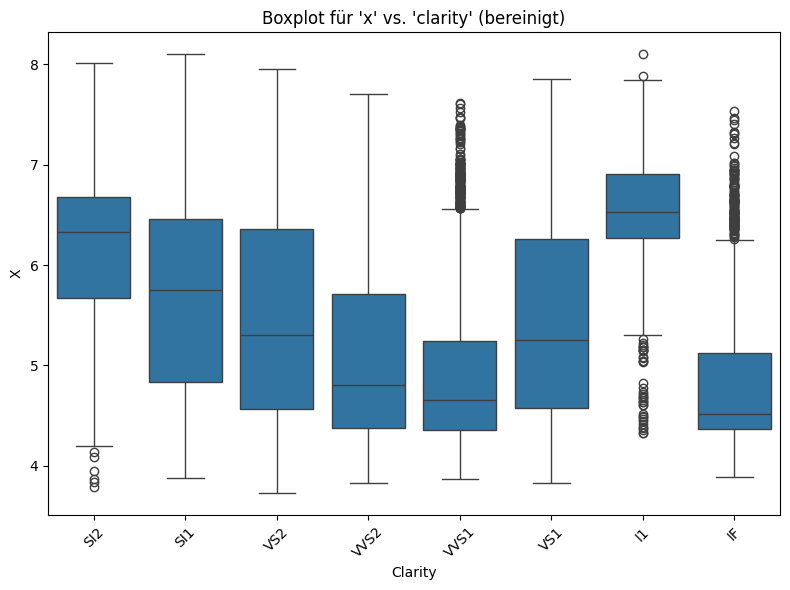

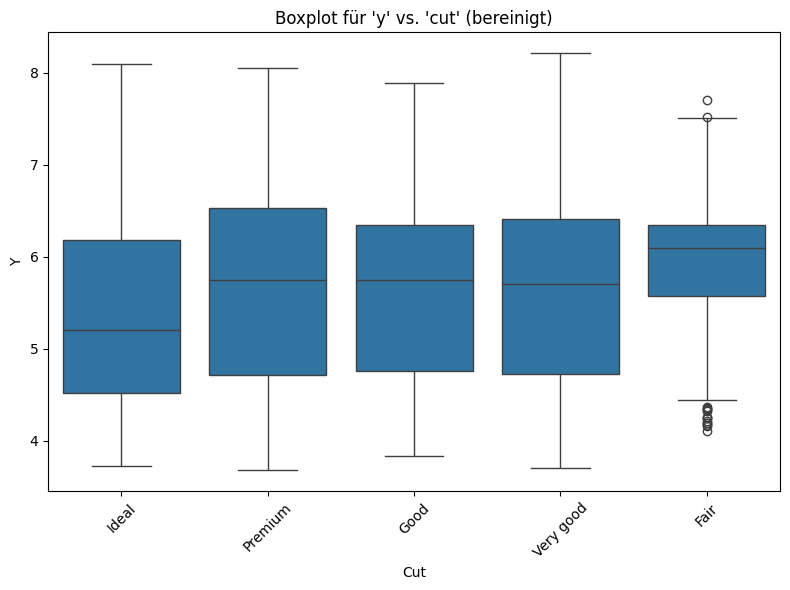

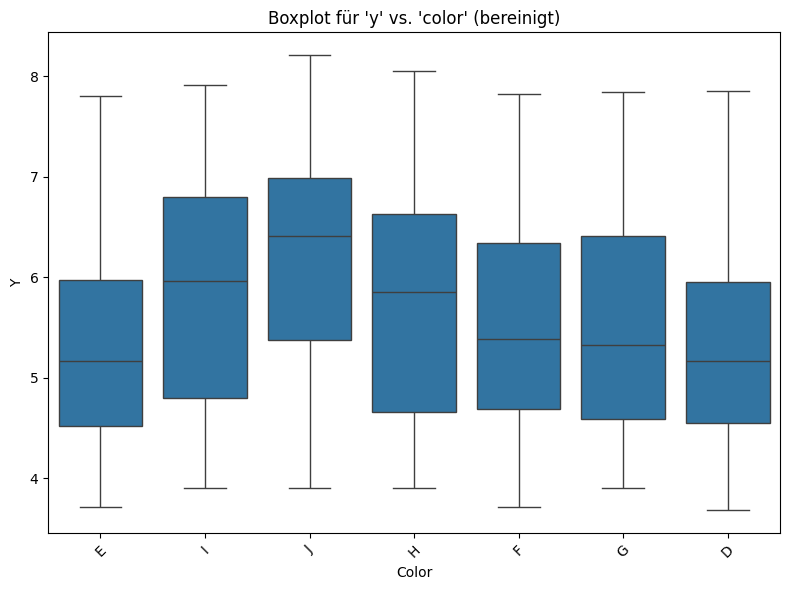

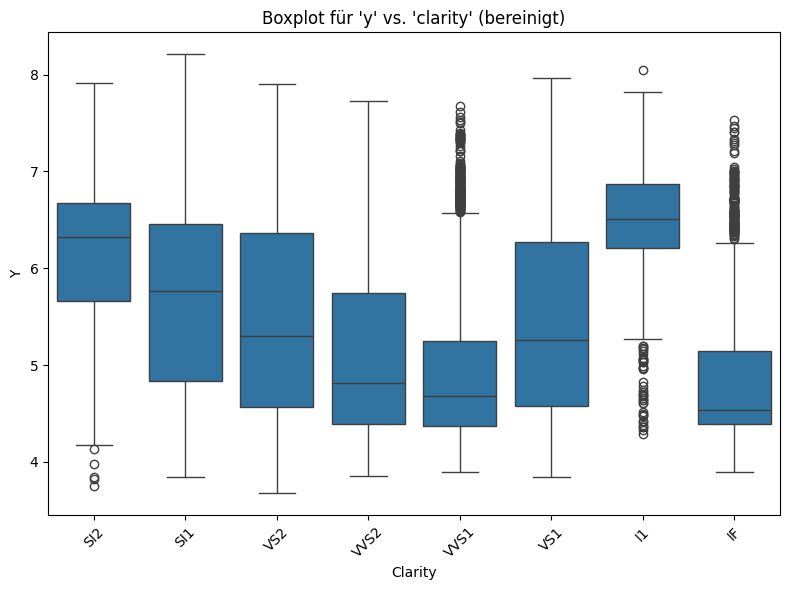

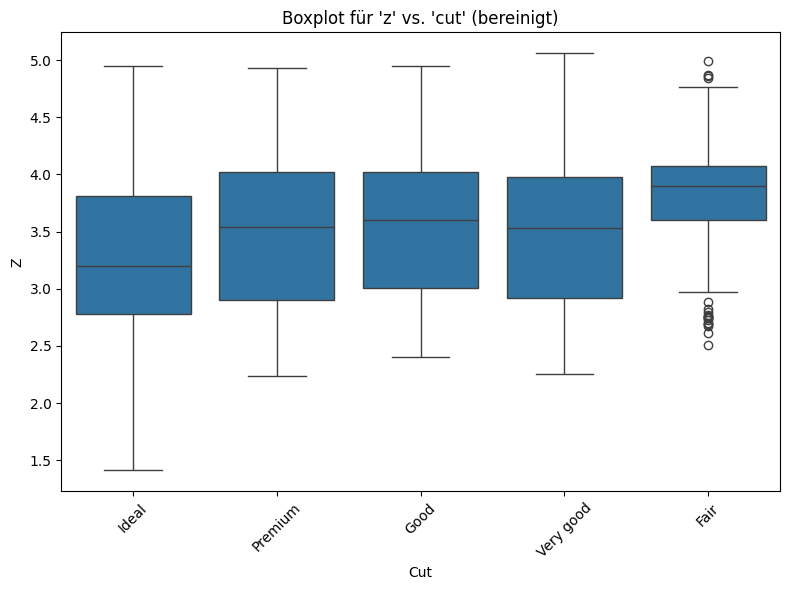

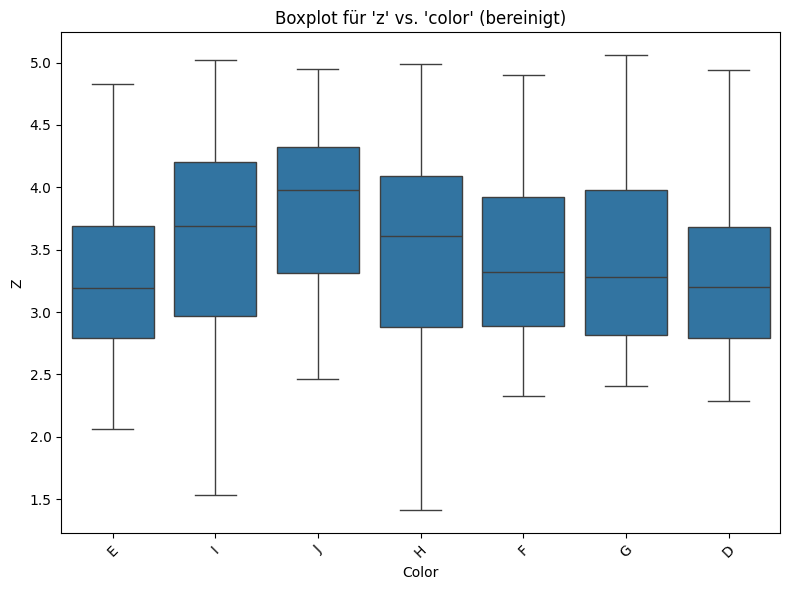

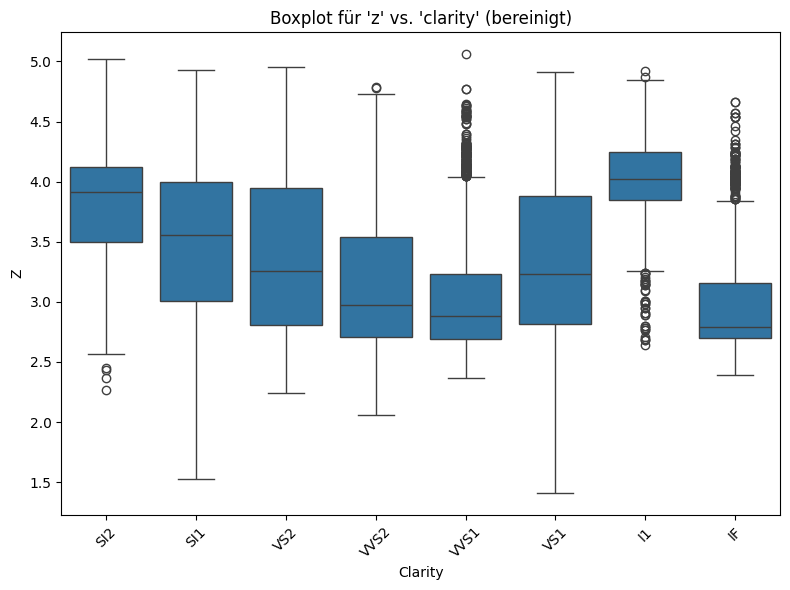

In [476]:
# Nach der Bereinigung: #Boxplots für alle kategorischen Features mit numerischen Features (Visuelle Darstellung der Tabelle drüber)
for numerical_feature in numerical_features:
    for categorical_feature in categorical_features:
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=df, x=categorical_feature, y=numerical_feature)
        plt.title(f"Boxplot für '{numerical_feature}' vs. '{categorical_feature}' (bereinigt)")
        plt.xlabel(categorical_feature.capitalize())
        plt.ylabel(numerical_feature.capitalize())
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


In [480]:
# Zusammenfassung der Analyseergebnisse
print("Abschließende Analyse der Diamant-Daten:")
print("- Carat (quantit. Feature) ist der stärkste Einflussfaktor auf den Preis (Korrelation: ~0.92) -> größere Diamanten sind teurer.")
print("- Dimensionen x, y, z (quantit. Feature) korrelieren ebenso stark mit dem Preis (~0.9), da sie Größe des Diamanten bestätigen.")
print("- Cut (kateg. Feature) hat Einfluss auf den Durchschnittspreis -> Premium-Diamanten sind am teuersten sind (~3336.86), gefolgt von Ideal-Diamanten (~2698.10).")
print("- Color (kateg. Feature) zeigt, dass Diamanten mit schlechteren Farben, wie J, I oft teurer sind, weil sie mit größeren Carat-Größen kombiniert werden.")
print("- Clarity (kateg. Feature beeinflusst den Preis moderat; SI2 und VS2 haben die höchsten Durchschnittspreise.")
print("- Depth und Table haben sehr wenig Einfluss auf den Preis (Korrelation: ~0.01 bis 0.19).")
print("- Maximalpreise (~11k) sind unabhängig von den Kategorien -> werden durch carat-Größe und x,y,z bestimmt.")

print("\nFazit:")
print("Die Preisvorhersage wird hauptsächlich durch die numerischen Features Carat und Dimensionen (x, y, z) bestimmt, während kategorische Merkmale den Durchschnittspreis und die Streuung beeinflussen.")




Abschließende Analyse der Diamant-Daten:
- Carat (quantit. Feature) ist der stärkste Einflussfaktor auf den Preis (Korrelation: ~0.92) -> größere Diamanten sind teurer.
- Dimensionen x, y, z (quantit. Feature) korrelieren ebenso stark mit dem Preis (~0.9), da sie Größe des Diamanten bestätigen.
- Cut (kateg. Feature) hat Einfluss auf den Durchschnittspreis -> Premium-Diamanten sind am teuersten sind (~3336.86), gefolgt von Ideal-Diamanten (~2698.10).
- Color (kateg. Feature) zeigt, dass Diamanten mit schlechteren Farben, wie J, I oft teurer sind, weil sie mit größeren Carat-Größen kombiniert werden.
- Clarity (kateg. Feature beeinflusst den Preis moderat; SI2 und VS2 haben die höchsten Durchschnittspreise.
- Depth und Table haben sehr wenig Einfluss auf den Preis (Korrelation: ~0.01 bis 0.19).
- Maximalpreise (~11k) sind unabhängig von den Kategorien -> werden durch carat-Größe und x,y,z bestimmt.

Fazit:
Die Preisvorhersage wird hauptsächlich durch die numerischen Features Carat und D

In [478]:
# Datei speichern
df_cleaned.to_csv("diamonds_cleaned.csv", index=False)